# Limpieza e inspección de los datos

Para organizar nuestro notebook (script), dedicaremos la _celda_ inicial a la carga de librerías necesarias para la ejecución del script completo. Si necesitamos instalar algunas de ellas porque no estén disponibles en nuestro repositorio, las instalaremos y dejaremos indicado que hemos necesitado instalarlas. Esto servirá para la configuración del entorno de trabajo de futuros proyectos. :)   

El notebook está esturcturado como sigue:
* **Bloque A**: carga de datos.
* **Bloque B**: inspección de datos.
* **Bloque C**: limpieza de datos y exportación del conjunto resultante.

### Librerías

In [1]:
#install.packages("naniar")
library(naniar)
library(ggplot2)

## BLOQUE A: carga de los datos
Los datos están en formato `.rdata`, así que los cargamos usando la función `load()`.

In [2]:
getwd() # Imprime directorio de trabajo
load('../data/data.rdata') # Carga un fichero data
ls()  # Muestra los objetos cargados en memoria 

[1] "/home/jovyan/soluciones"

[1] "data"

## BLOQUE B: inspección de los datos
El objetivo de la inspección es la **familiarización con el conjunto de datos**. Algunas preguntas iniciales que podría estar bien hacerse pueden ser:
* ¿En qué tipo de objeto están almacenados los datos? ¿Cuál es su dimensión?
* ¿Hay datos ausentes? 
* ¿Cómo están distribuídas las variables? ¿Hay diferencias entre ausencia/presencia DEFECTO?
* ¿Hay valores atípicos?
* ...

In [3]:
# Tipo de objeto
cat("El fichero es un", class(data),"de", nrow(data), "filas y", ncol(data), "columnas.")
head(data)

El fichero es un data.frame de 5000 filas y 20 columnas.

,numero.granos,numero.piezas,longitud.objetivo,bombeo1,bombeo2,bombeo3,presion1,presion2,presion3,suciedad.molde,temperatura1,temperatura2,tiempo.solido,quimico1,quimico2,quimico3,quimico4,quimico5,quimico6,defecto
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.18181818,0.2,0.2500000,0.6965610,0.07782671,0.3154362,0.6543779,0.8219178,0.5803842,0.00990099,0.5614035,0.5789474,0.1339973,0.0,0.4126074,0.20779221,0.18409091,0.55,0.001,0
2,0.36363636,0.6,0.0625000,0.7977073,0.01615269,0.2828380,0.2885945,0.7159818,0.6966633,0.75247525,NA,NA,0.1610338,0.4,0.7277937,0.23376623,0.84318182,0.70,0.001,0
3,0.09090909,0.2,0.3958333,0.6965610,0.07195297,0.3154362,0.5391705,0.8063927,0.6107179,0.70297030,NA,NA,0.1406952,0.0,0.4068768,0.35064935,0.06818182,0.50,0.001,0
4,1.00000000,1.0,0.0000000,0.6223871,0.02907488,0.0000000,0.7119816,0.5086758,0.1051567,0.73267327,0.3684211,0.3859649,0.1936860,0.0,0.6991404,0.20779221,0.89090909,0.55,0.001,0
5,0.00000000,0.0,1.0000000,0.8287256,0.07782671,0.4352828,0.7523041,0.8721462,0.1506572,0.29702970,NA,NA,0.1752747,0.0,0.4212034,0.09090909,0.10000000,0.80,0.001,0
6,0.00000000,0.0,0.8125000,0.8651382,0.07782671,0.4113135,0.7119816,0.8082191,0.6031345,0.60396040,0.6140351,0.5263158,0.5113145,0.0,0.4097421,0.20259740,0.20454545,0.45,0.000,1


Warning message:
“`gather_()` was deprecated in tidyr 1.2.0.
Please use `gather()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_lifecycle_warnings()` to see where this warning was generated.”


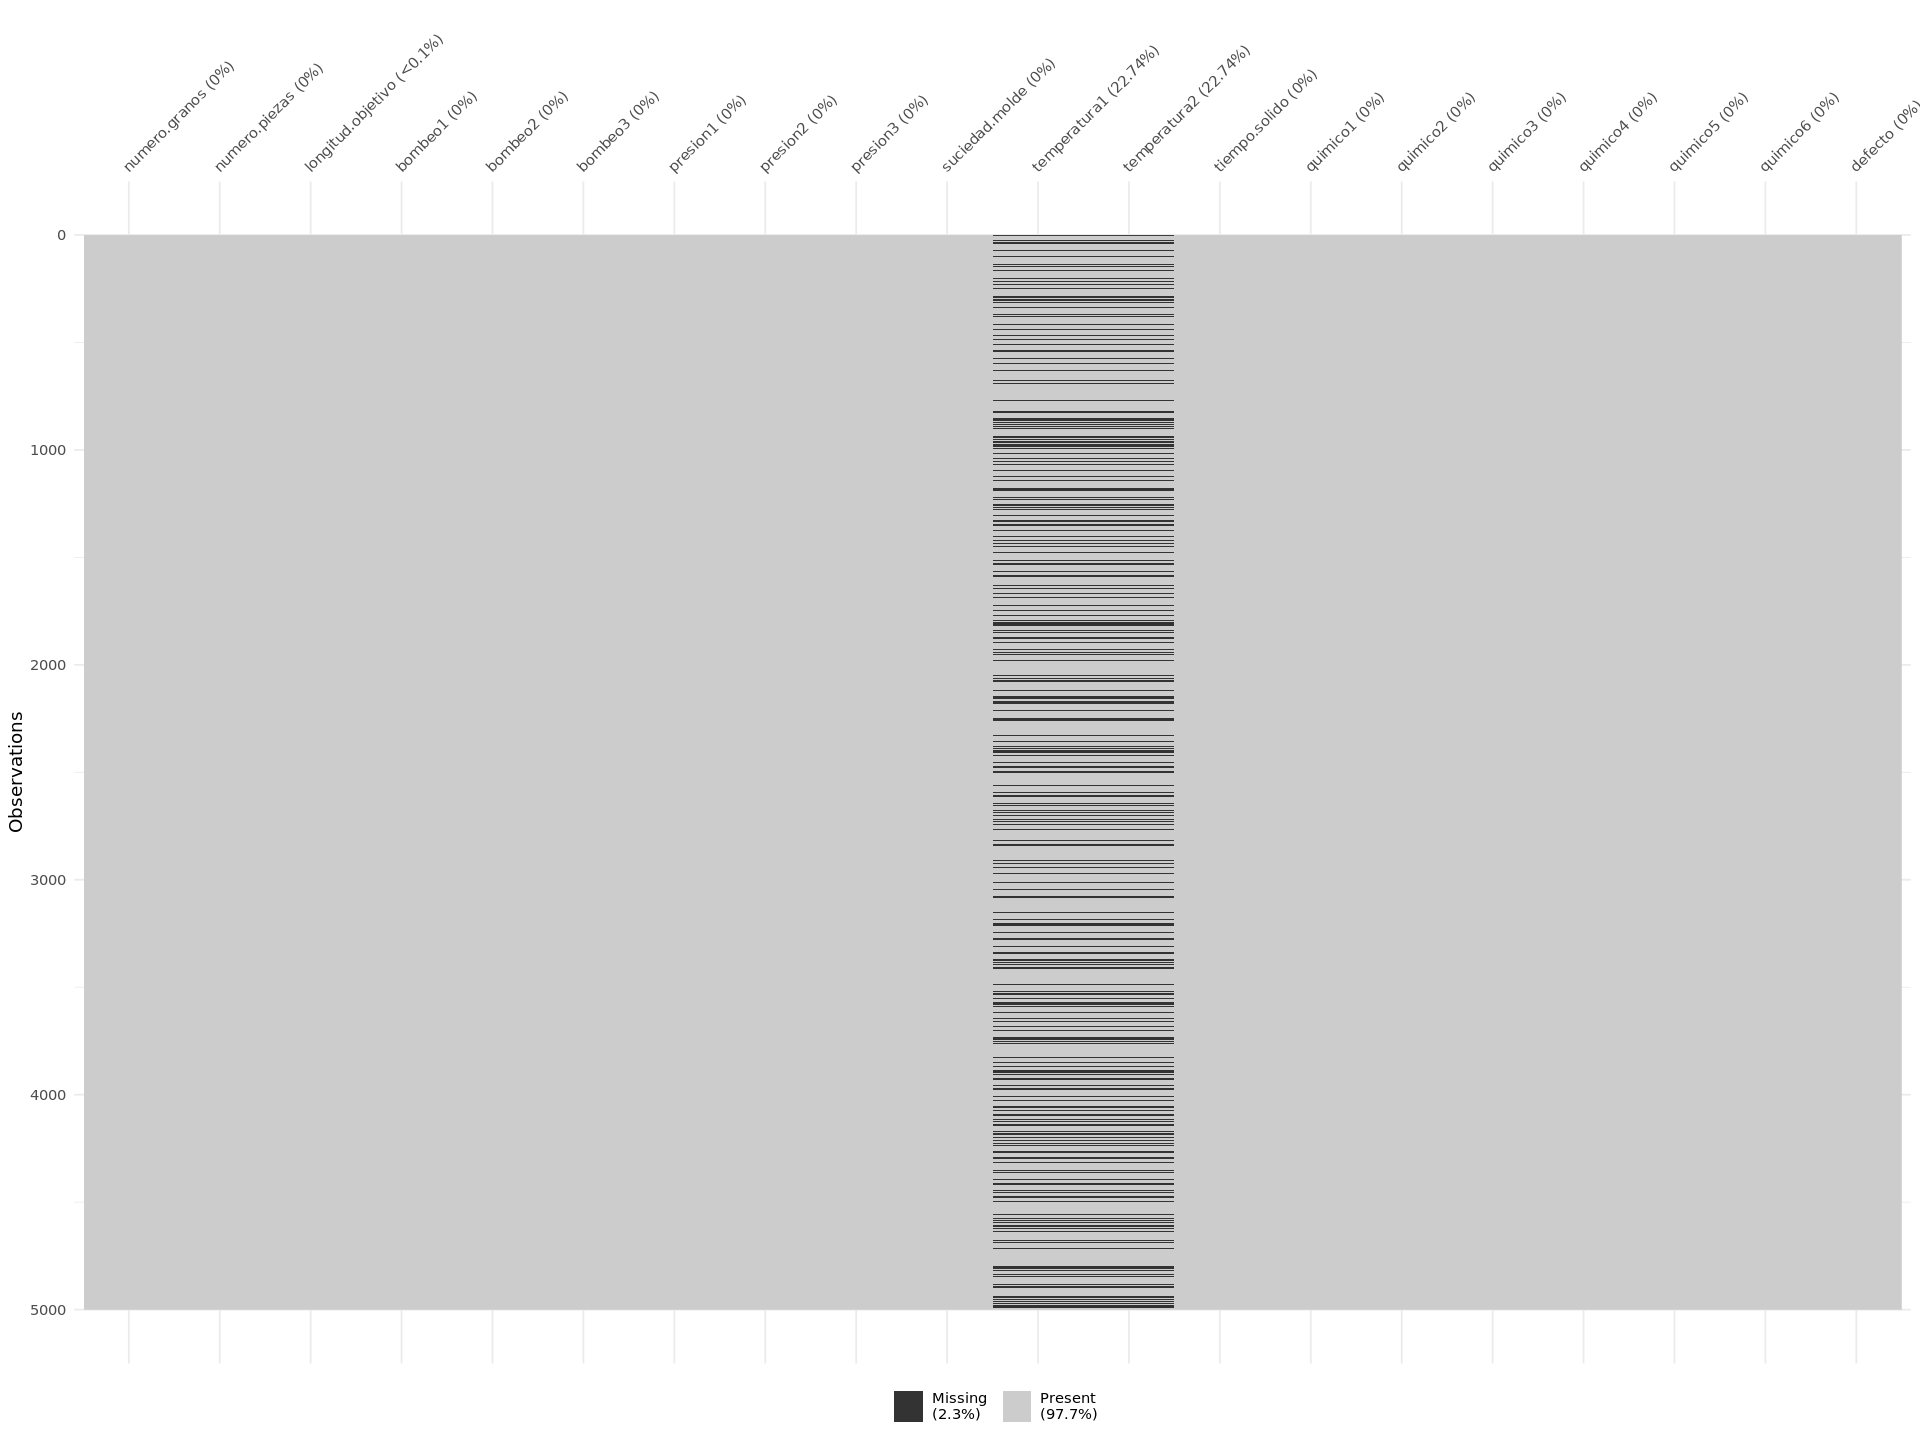

In [4]:
# Ausencias
options(repr.plot.width=16, repr.plot.height=12)
vis_miss(data)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



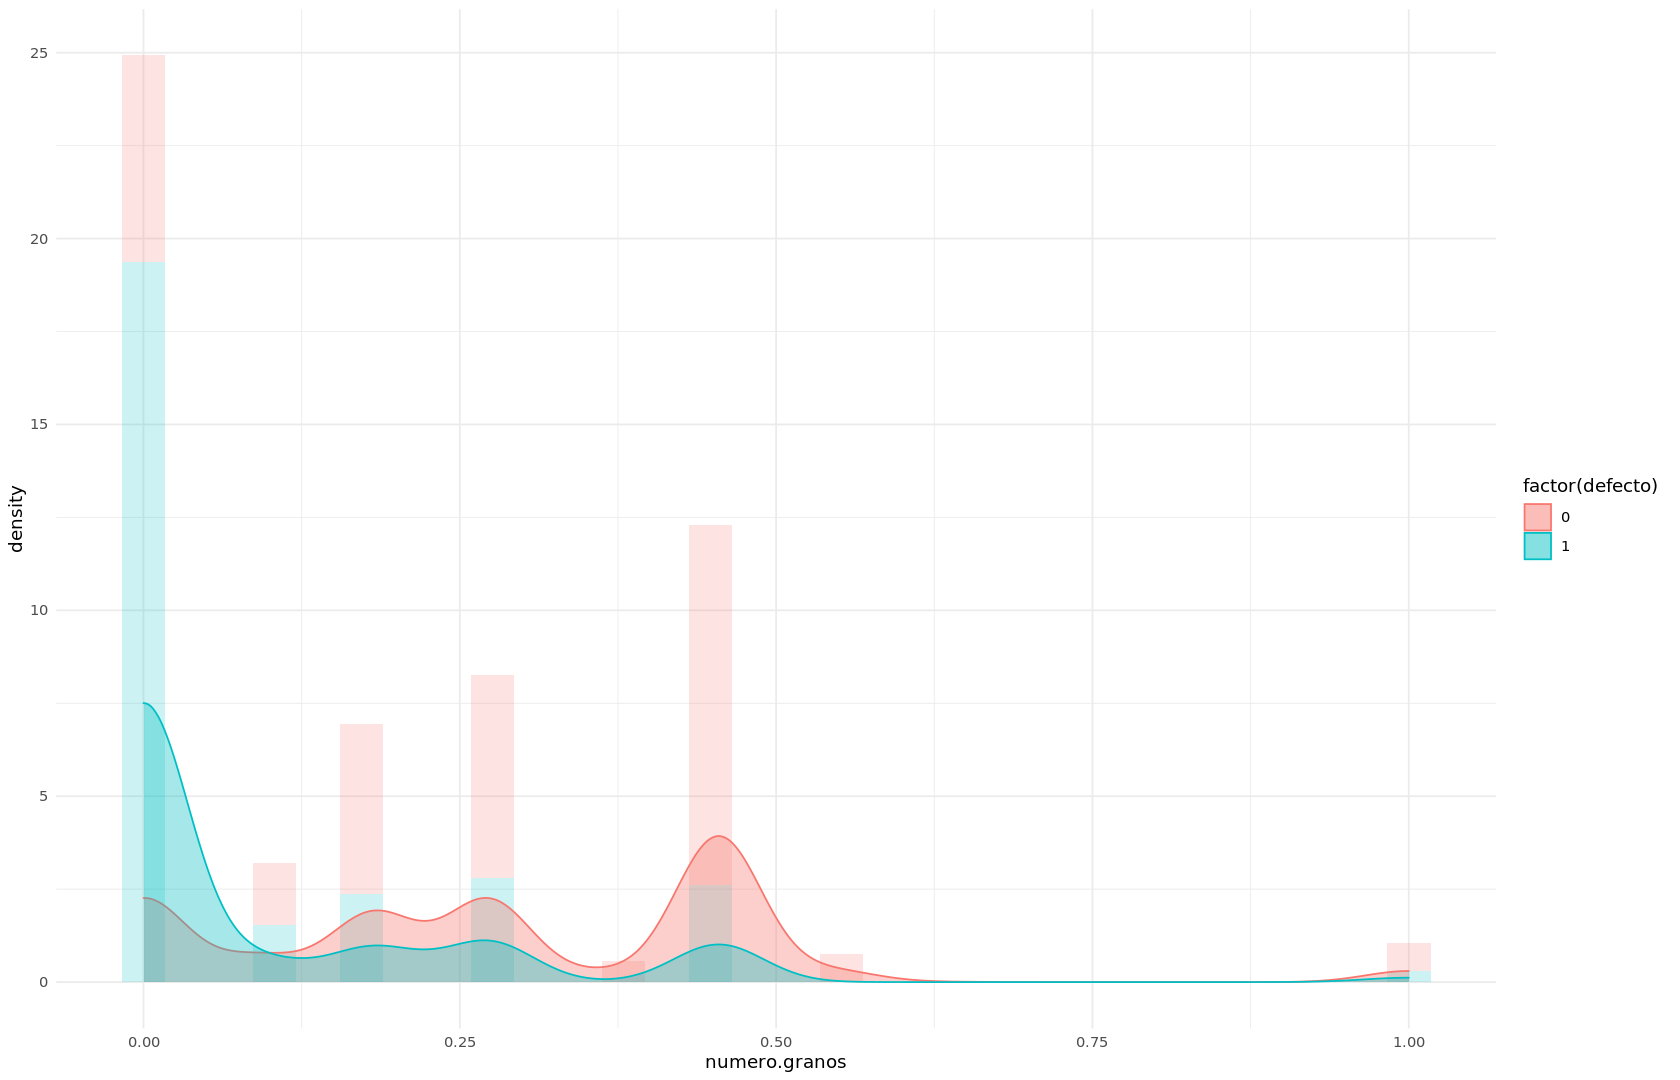

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1 rows containing non-finite values (stat_density).”


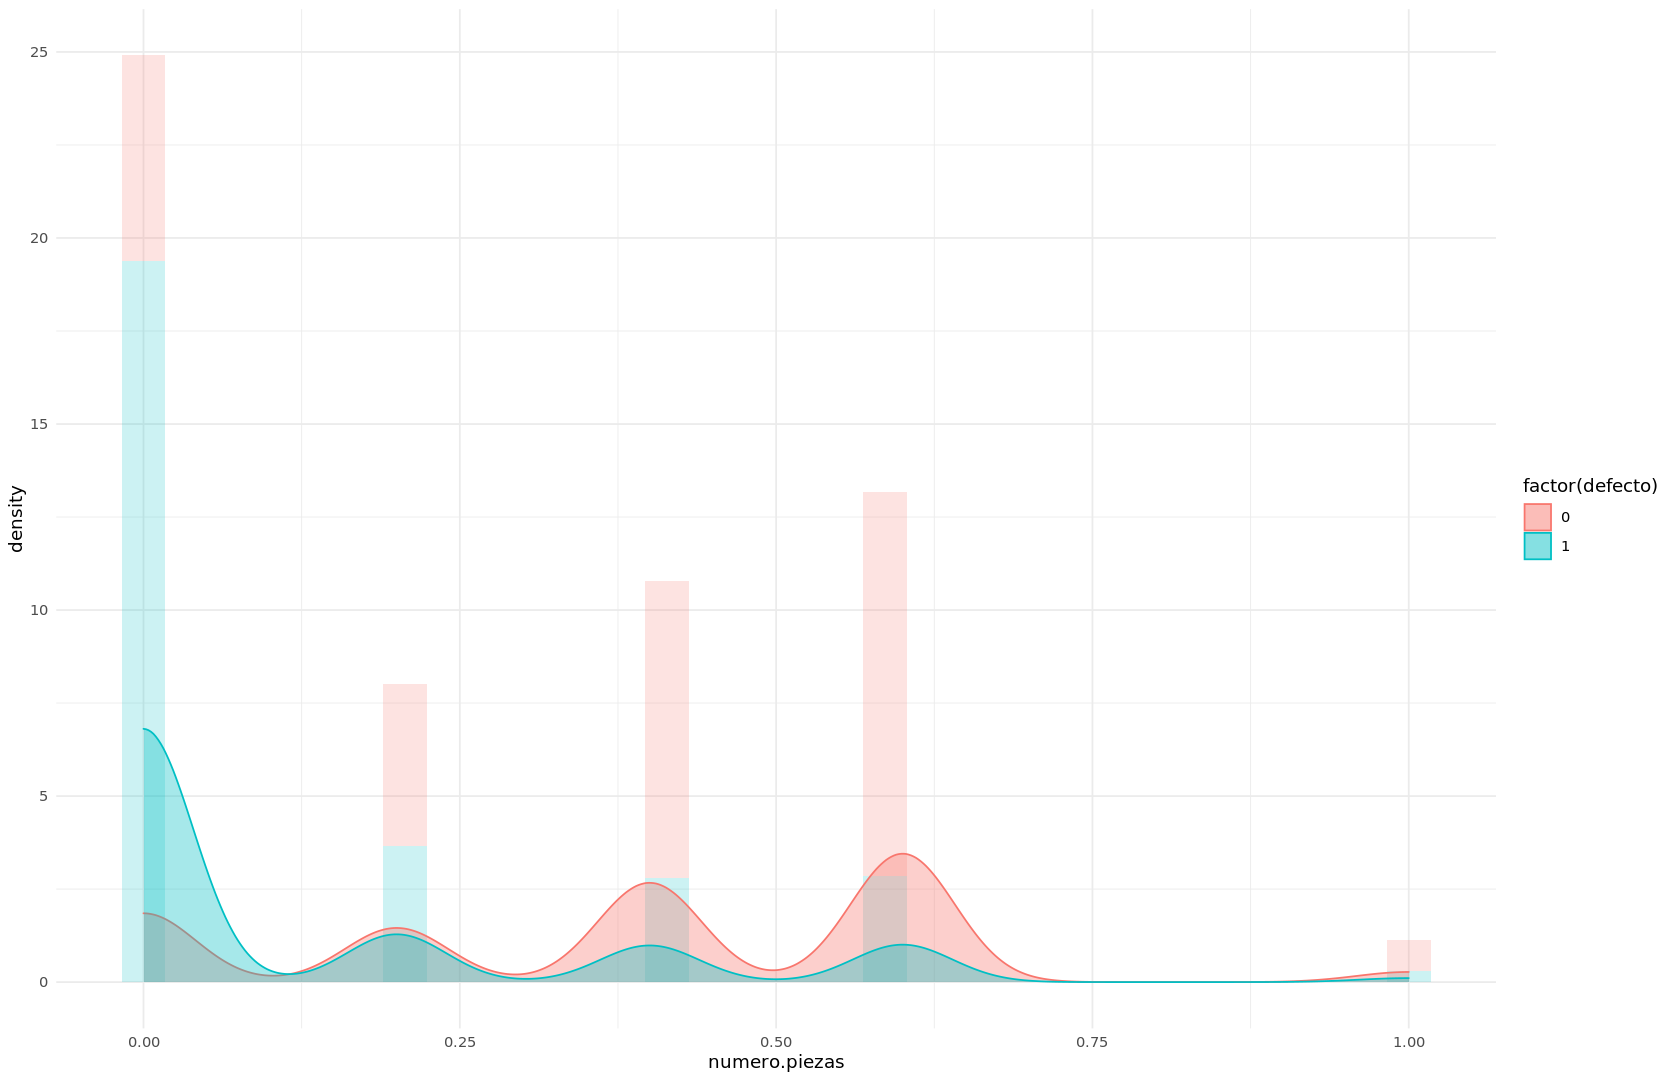

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



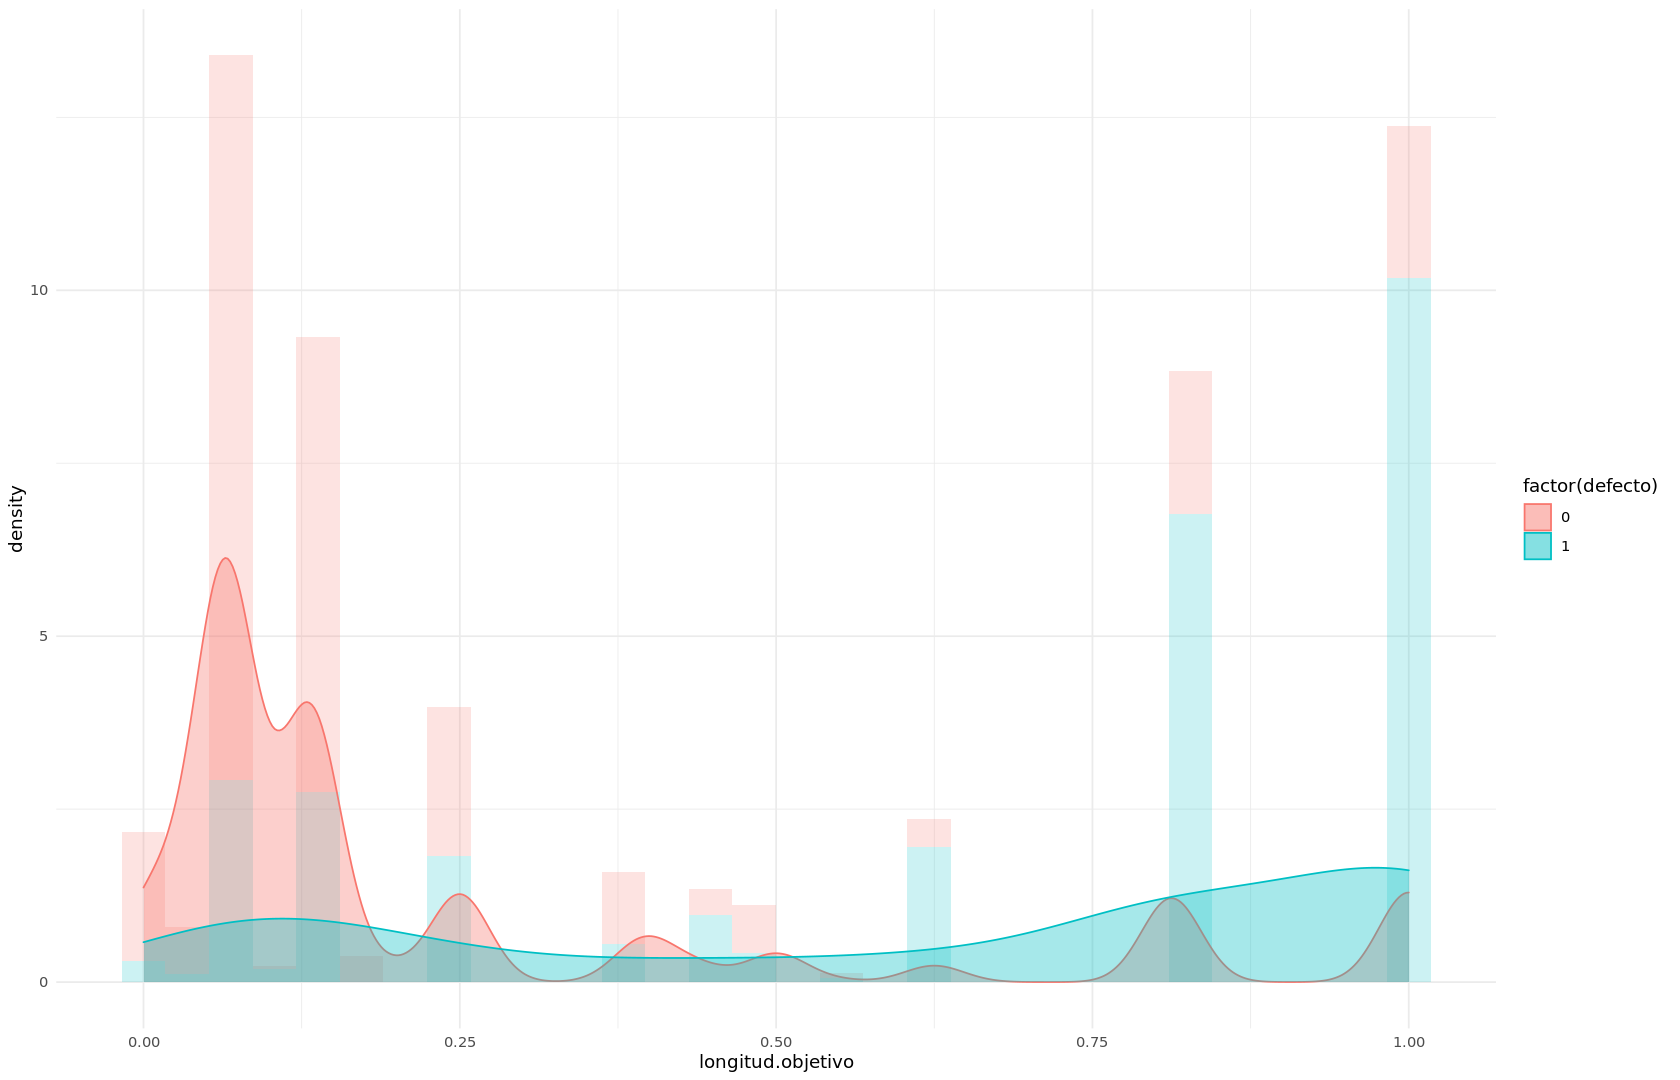

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



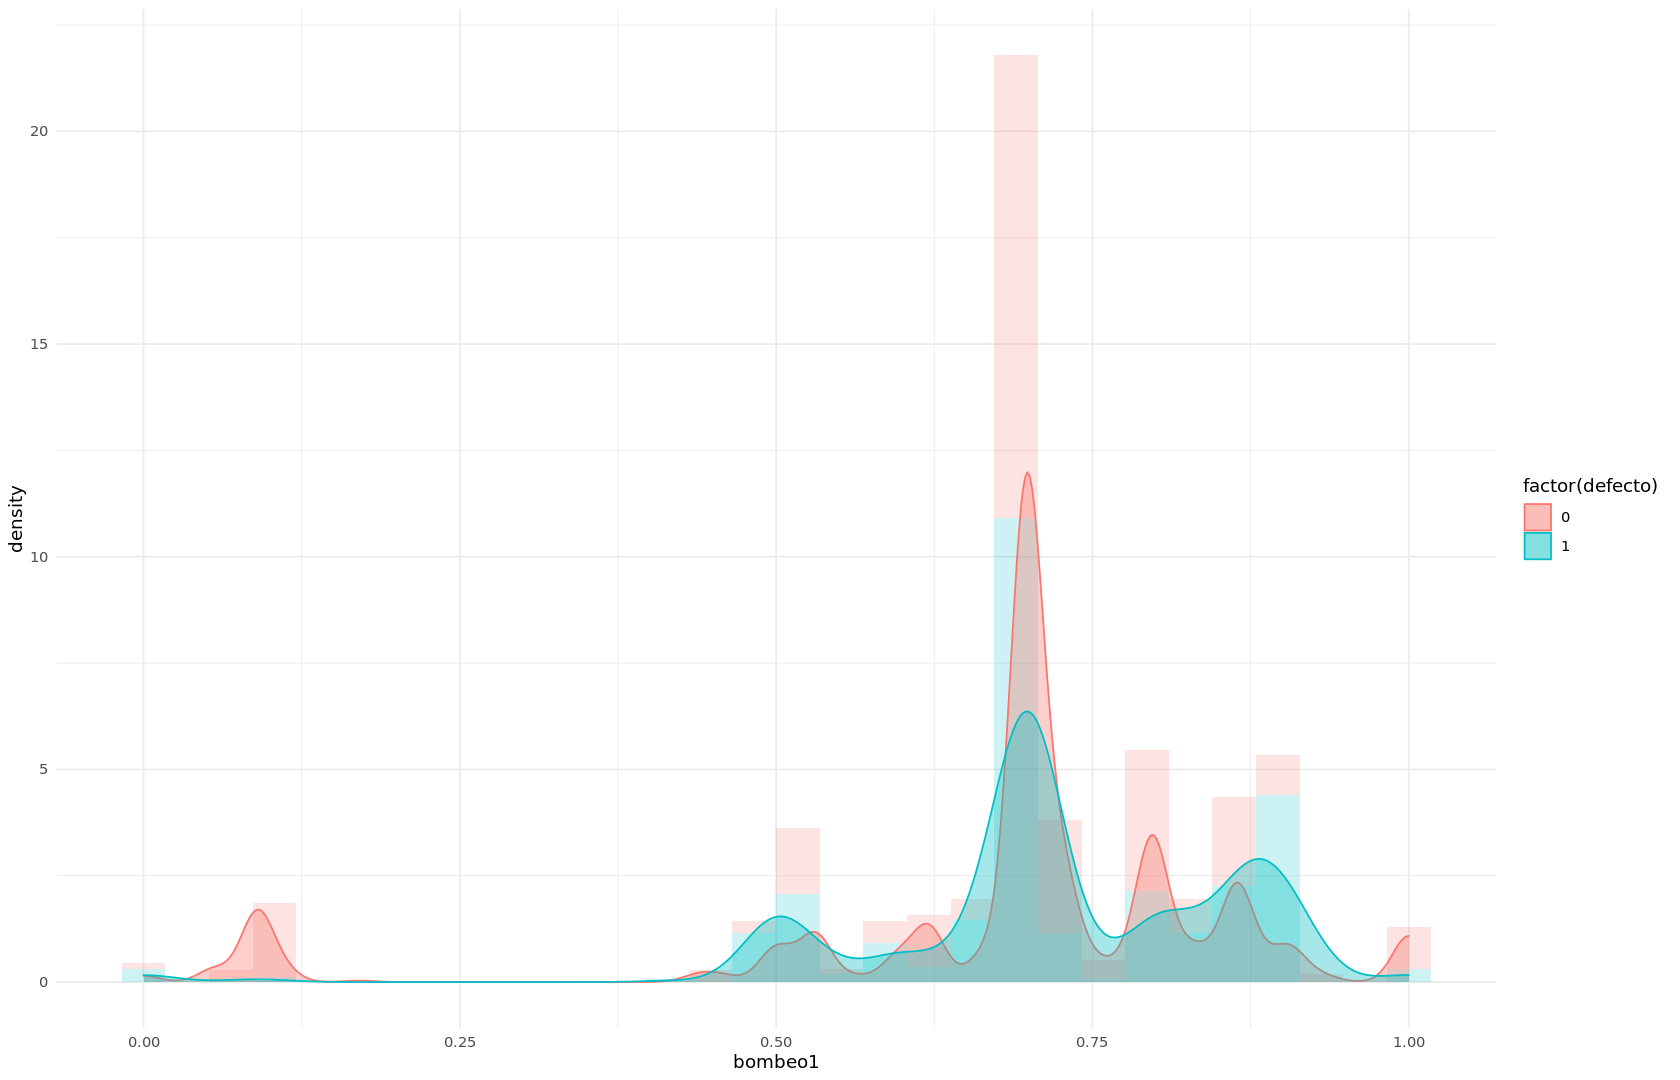

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



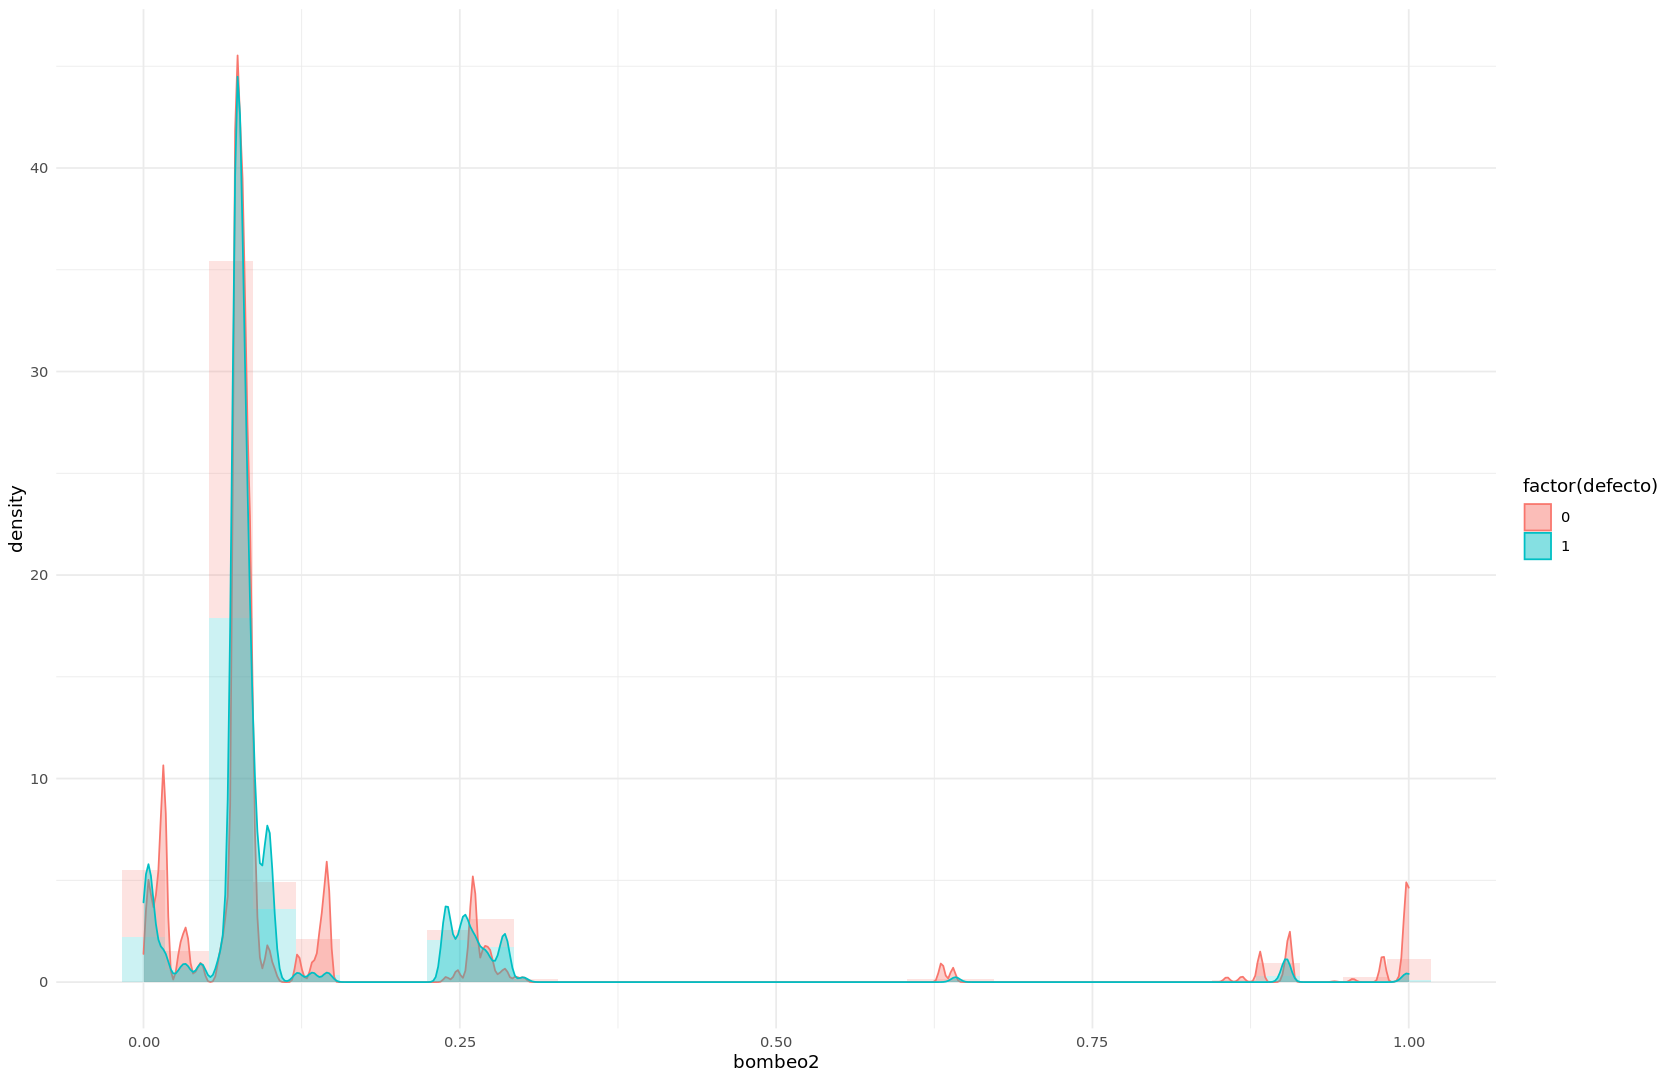

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



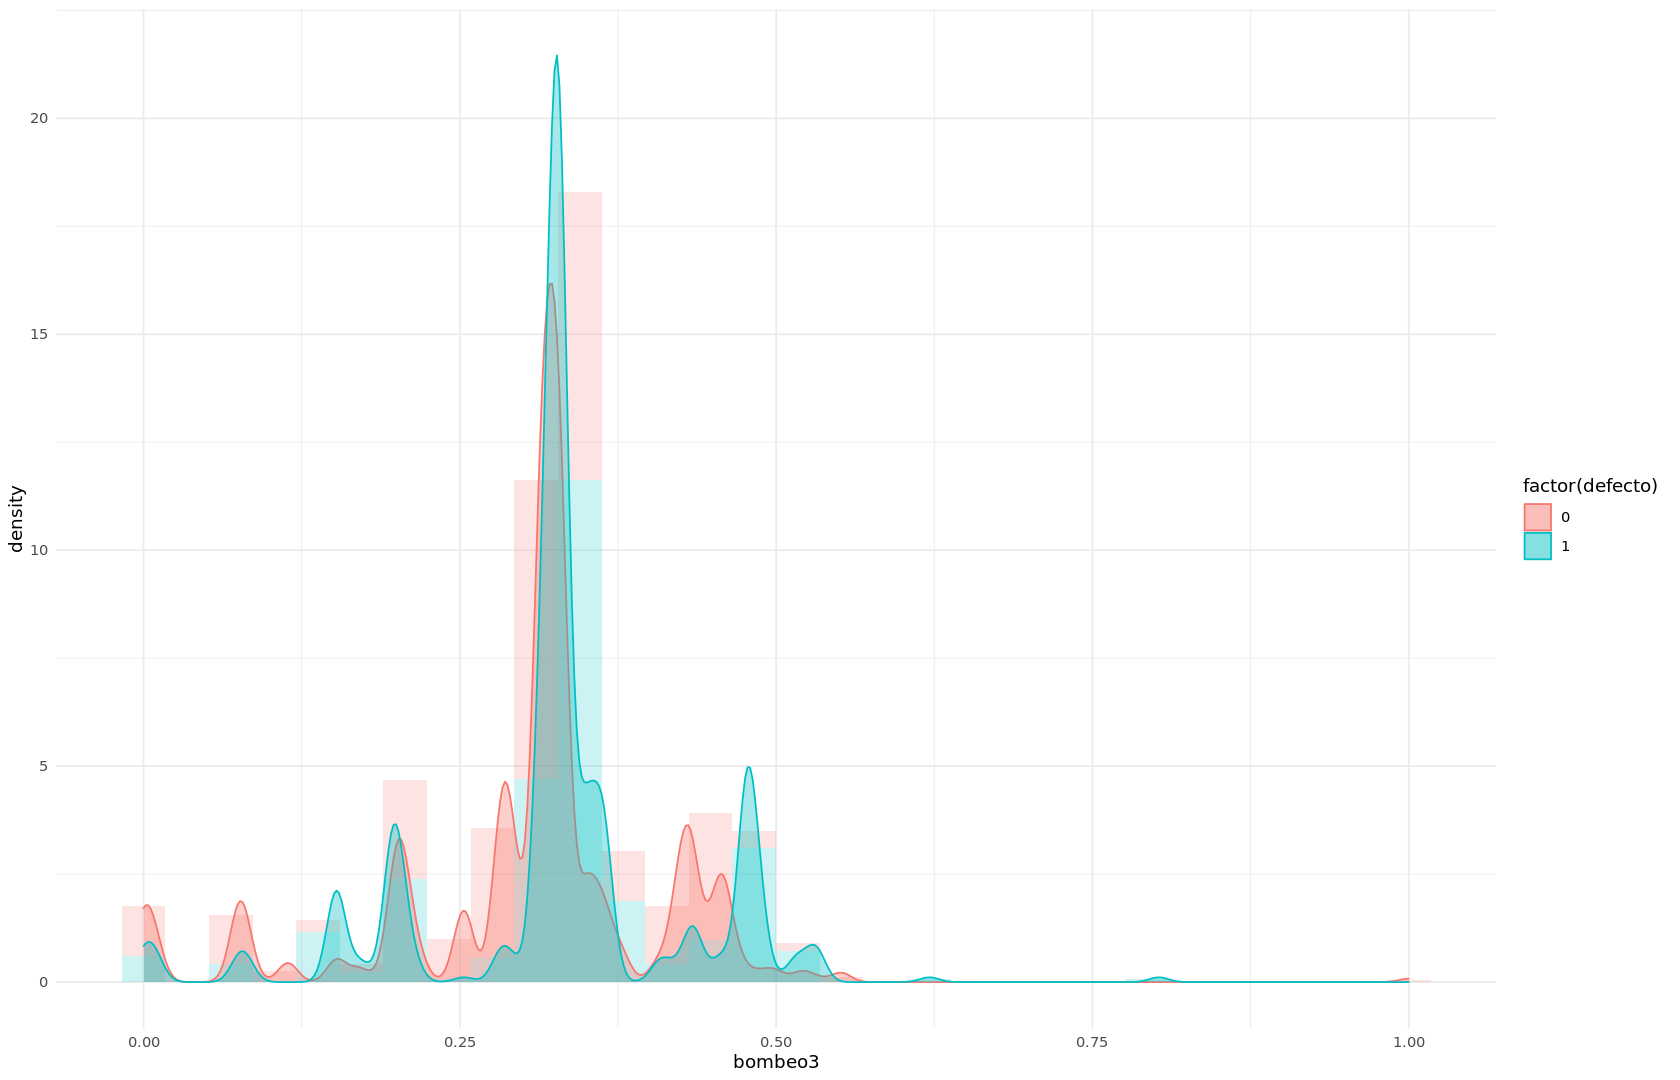

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



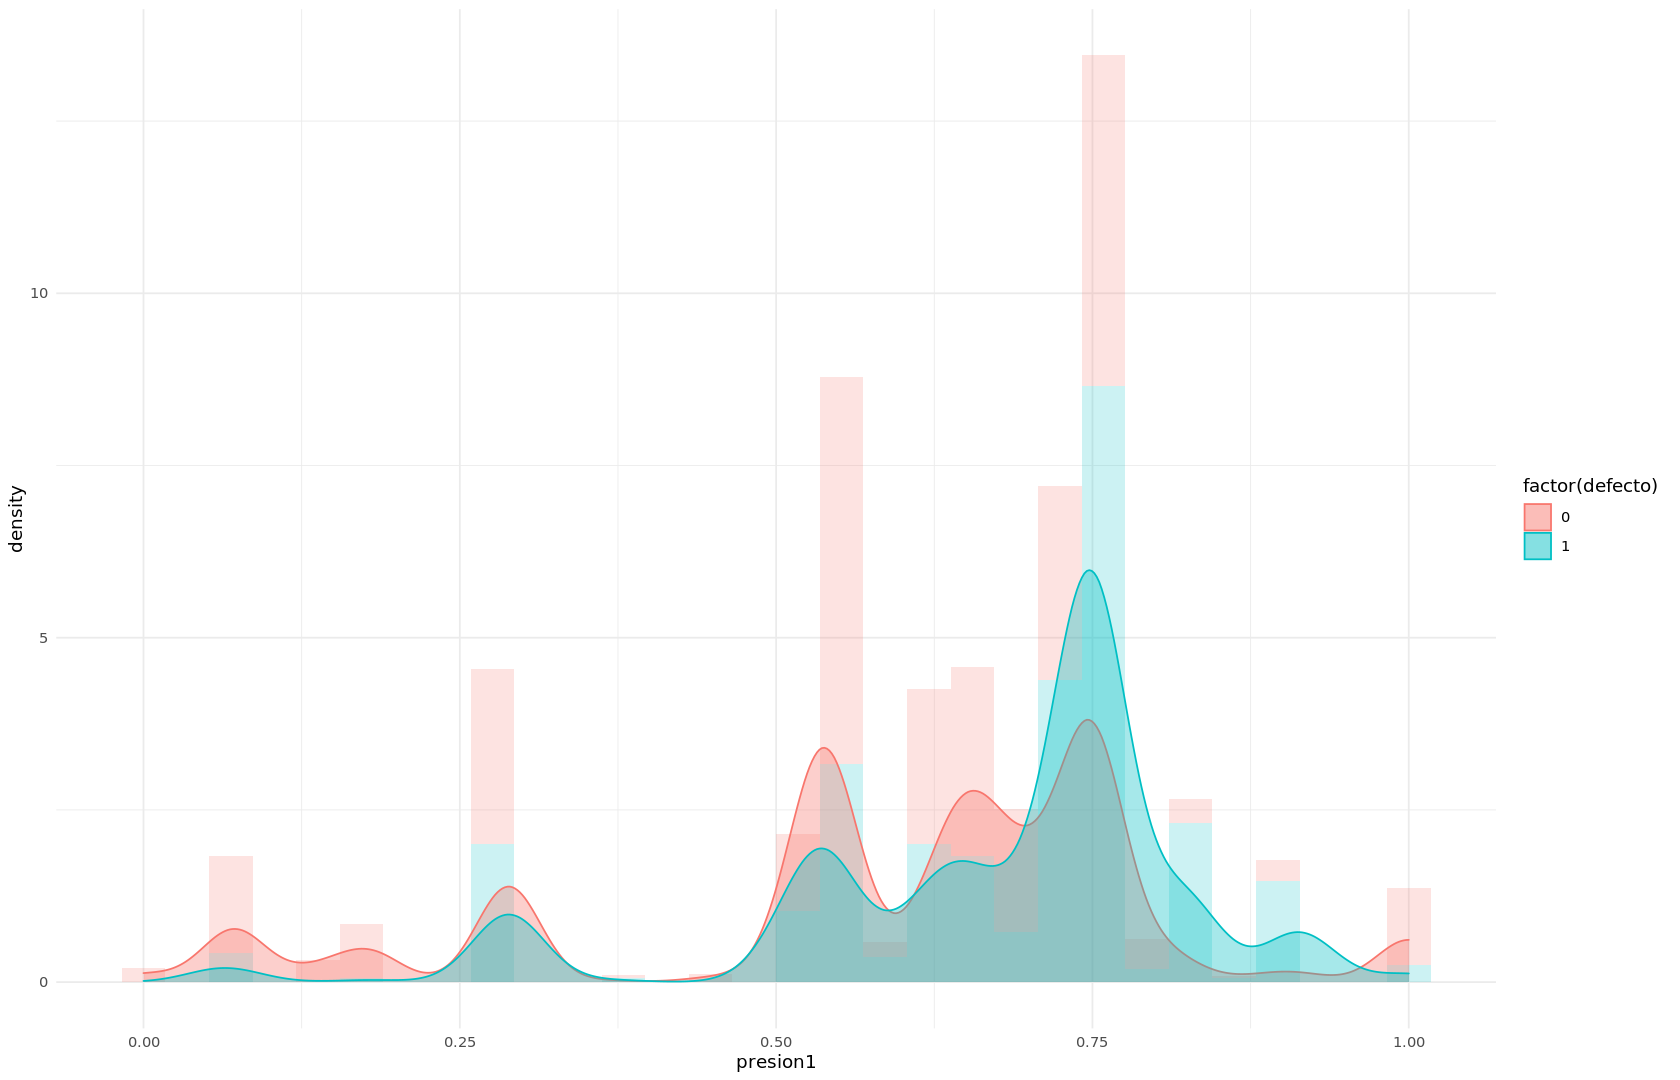

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



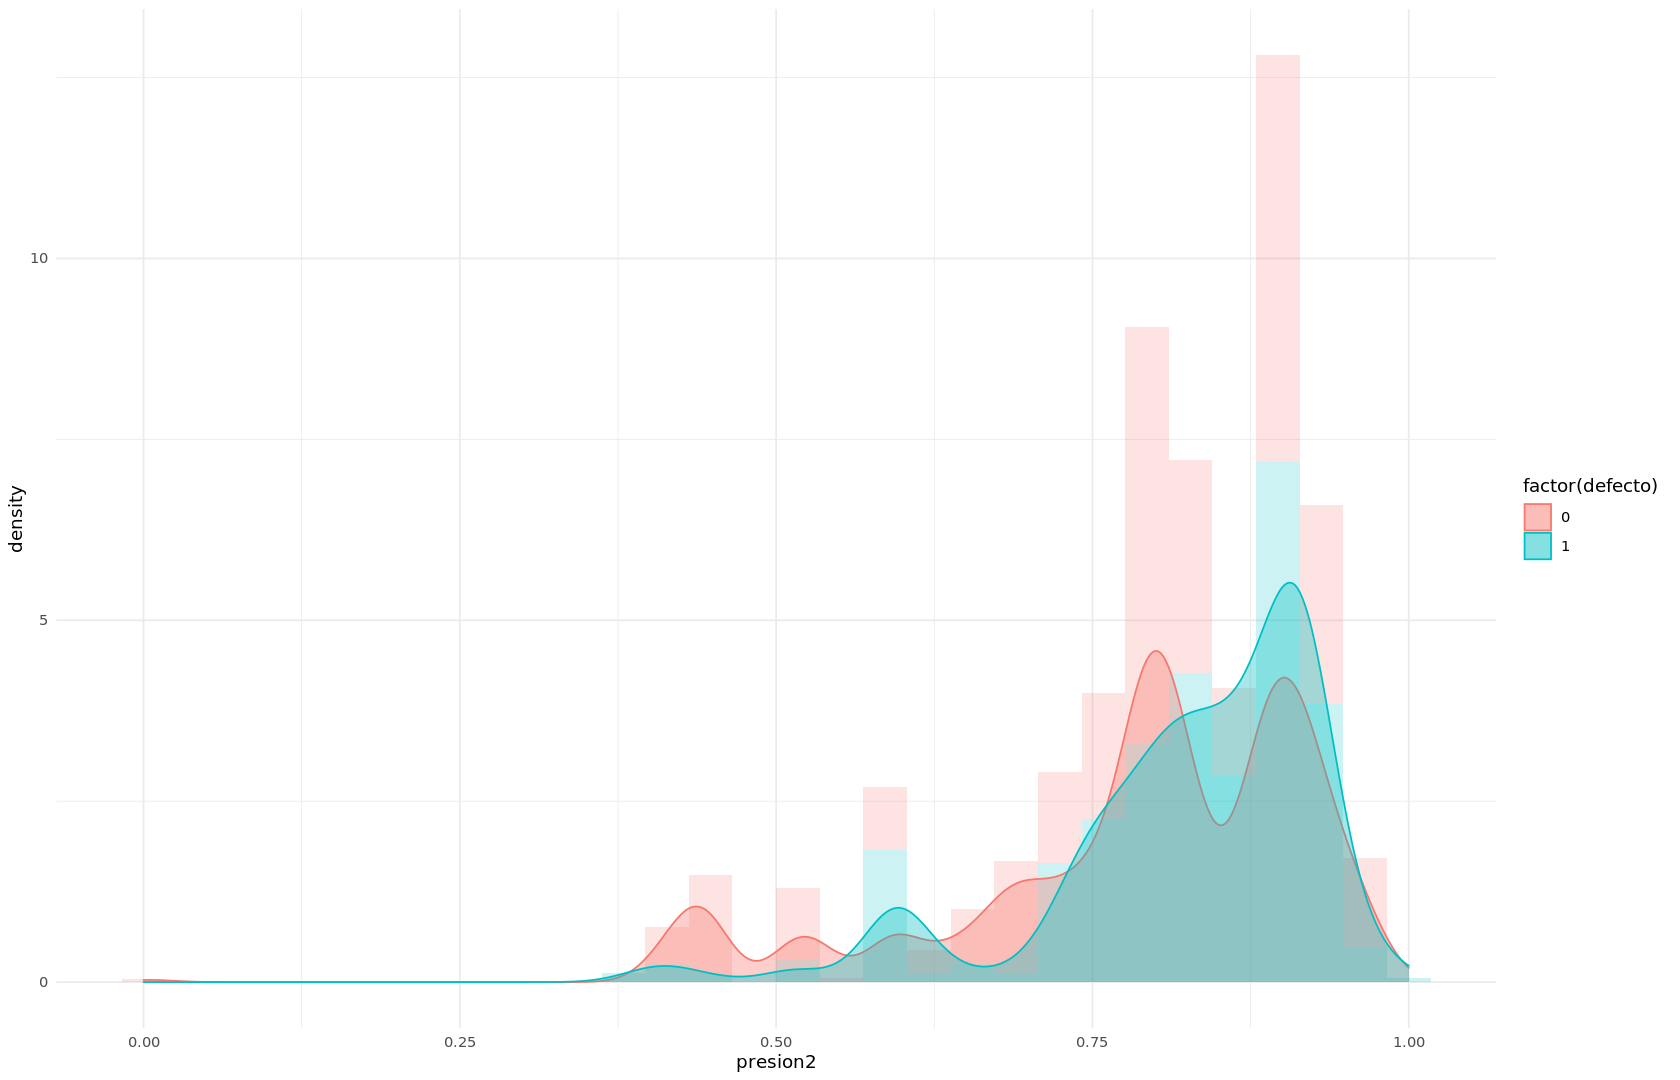

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



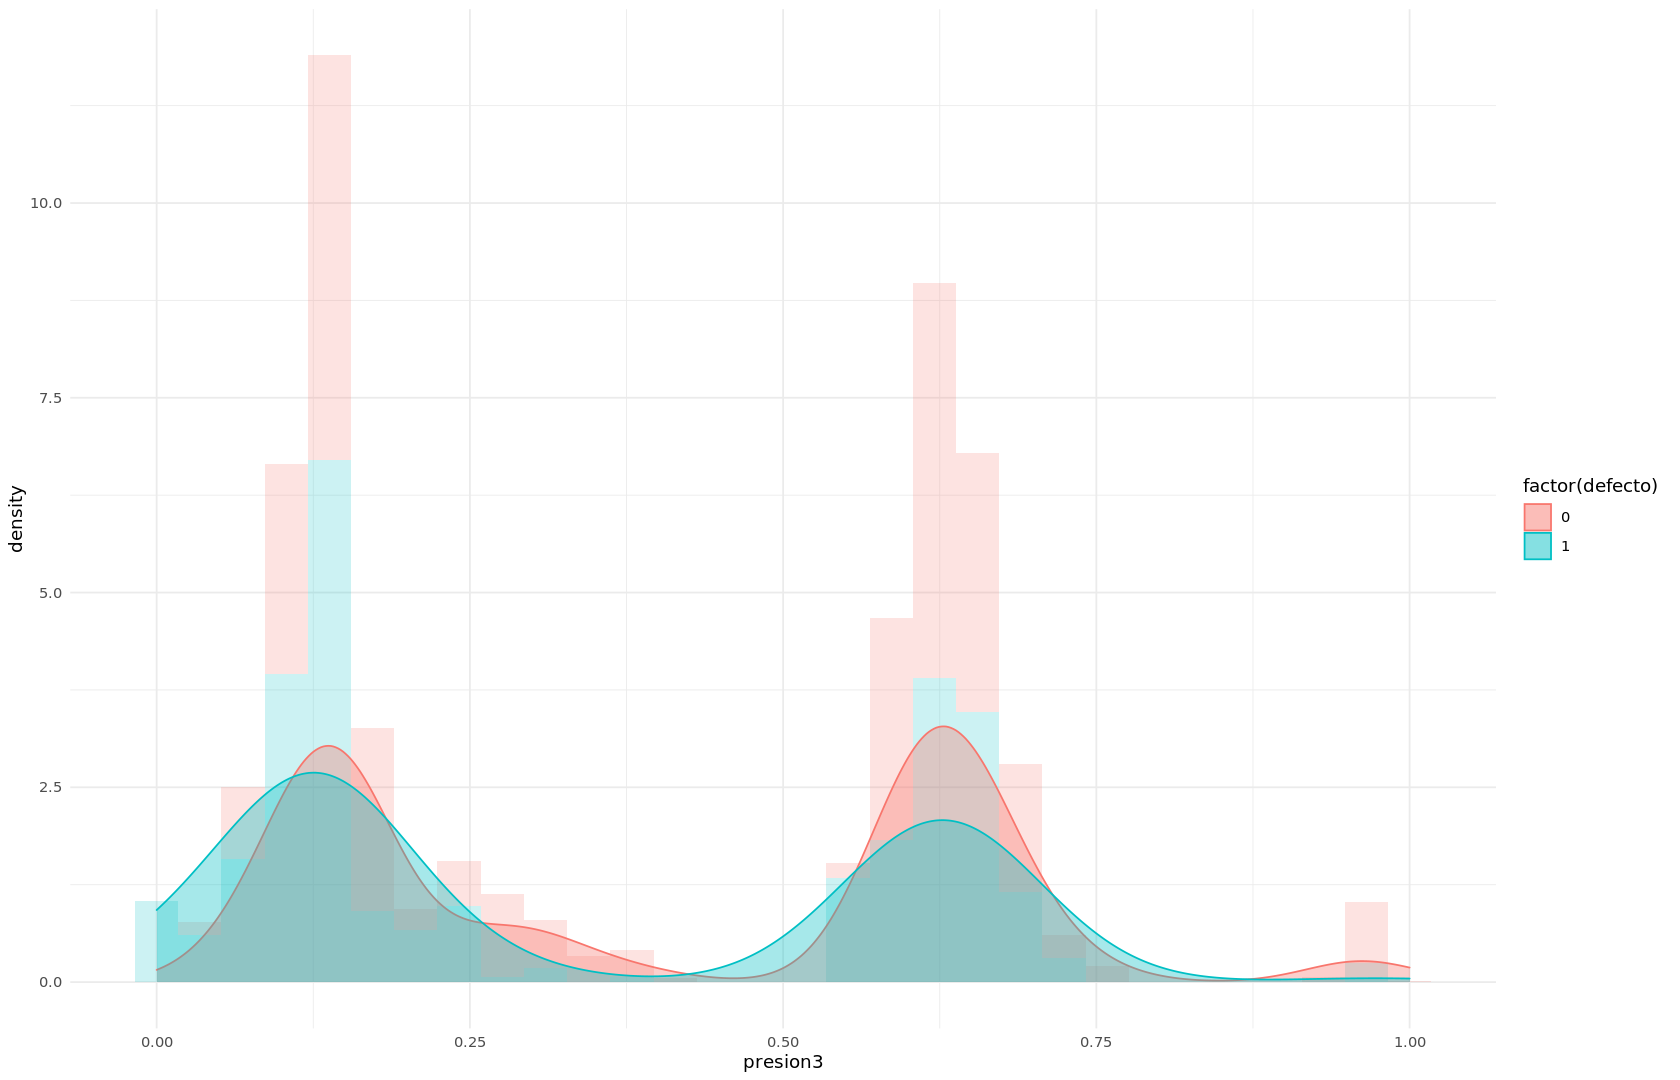

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1137 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1137 rows containing non-finite values (stat_density).”


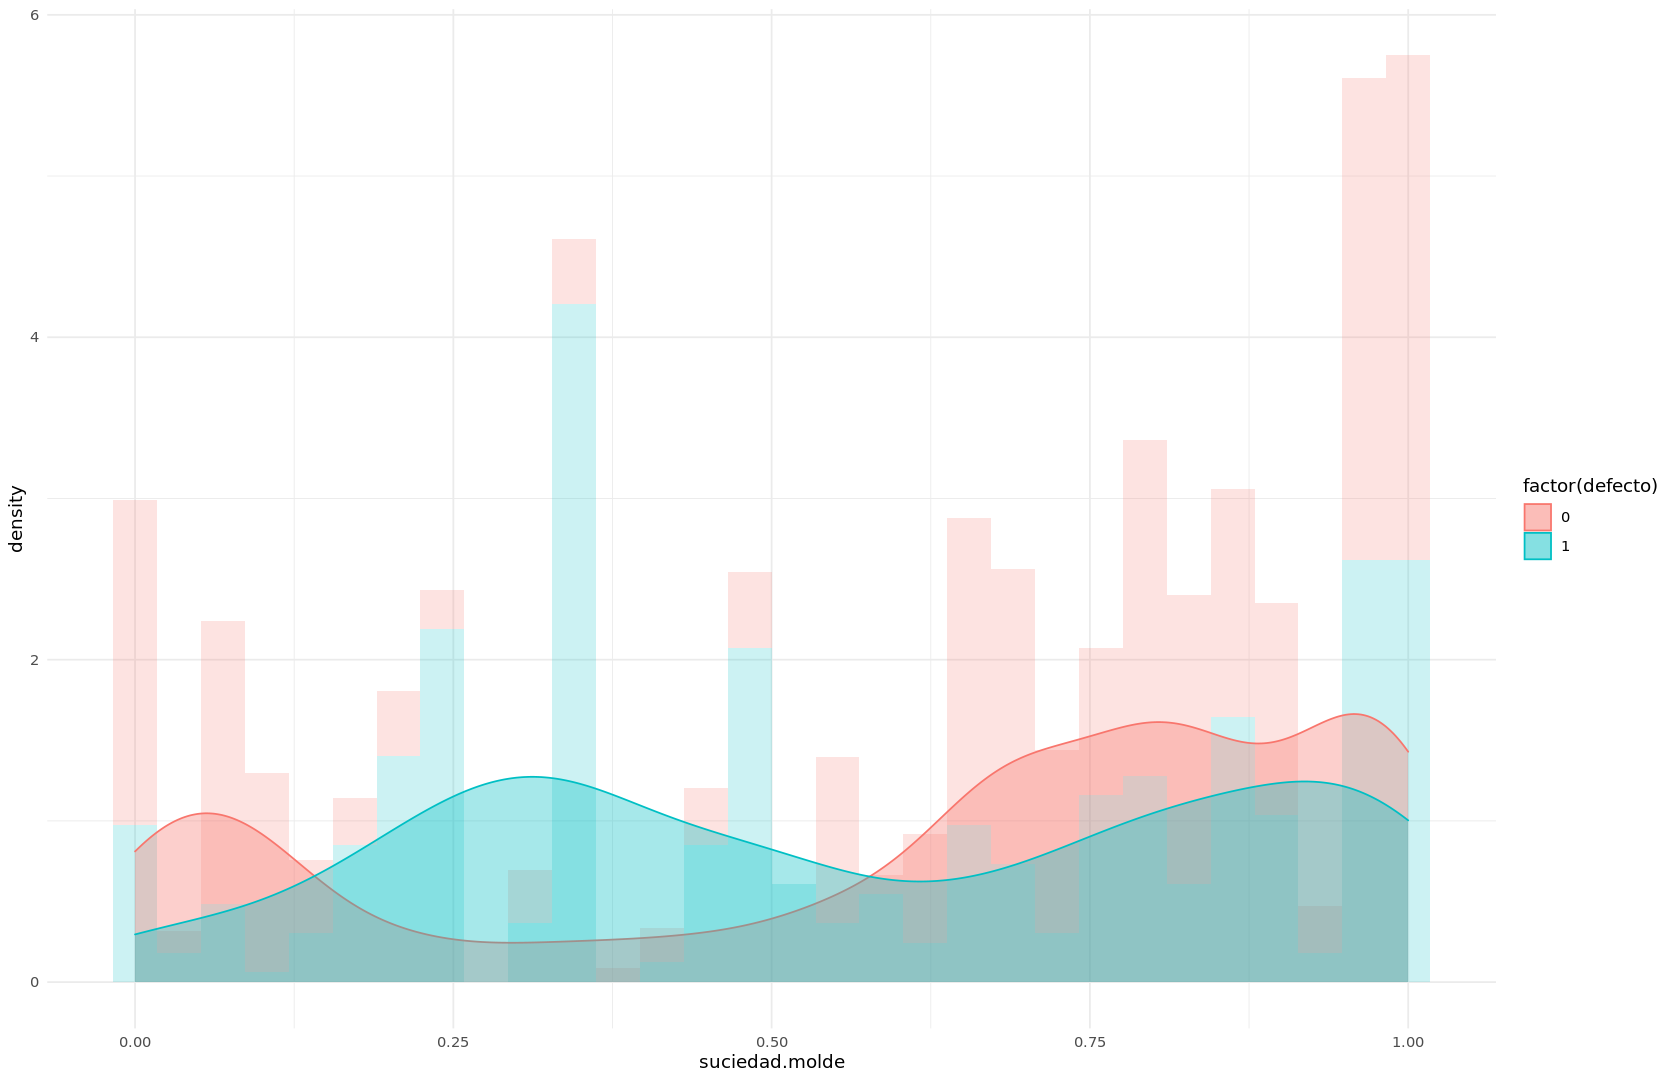

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 1137 rows containing non-finite values (stat_bin).”
Warning message:
“Removed 1137 rows containing non-finite values (stat_density).”


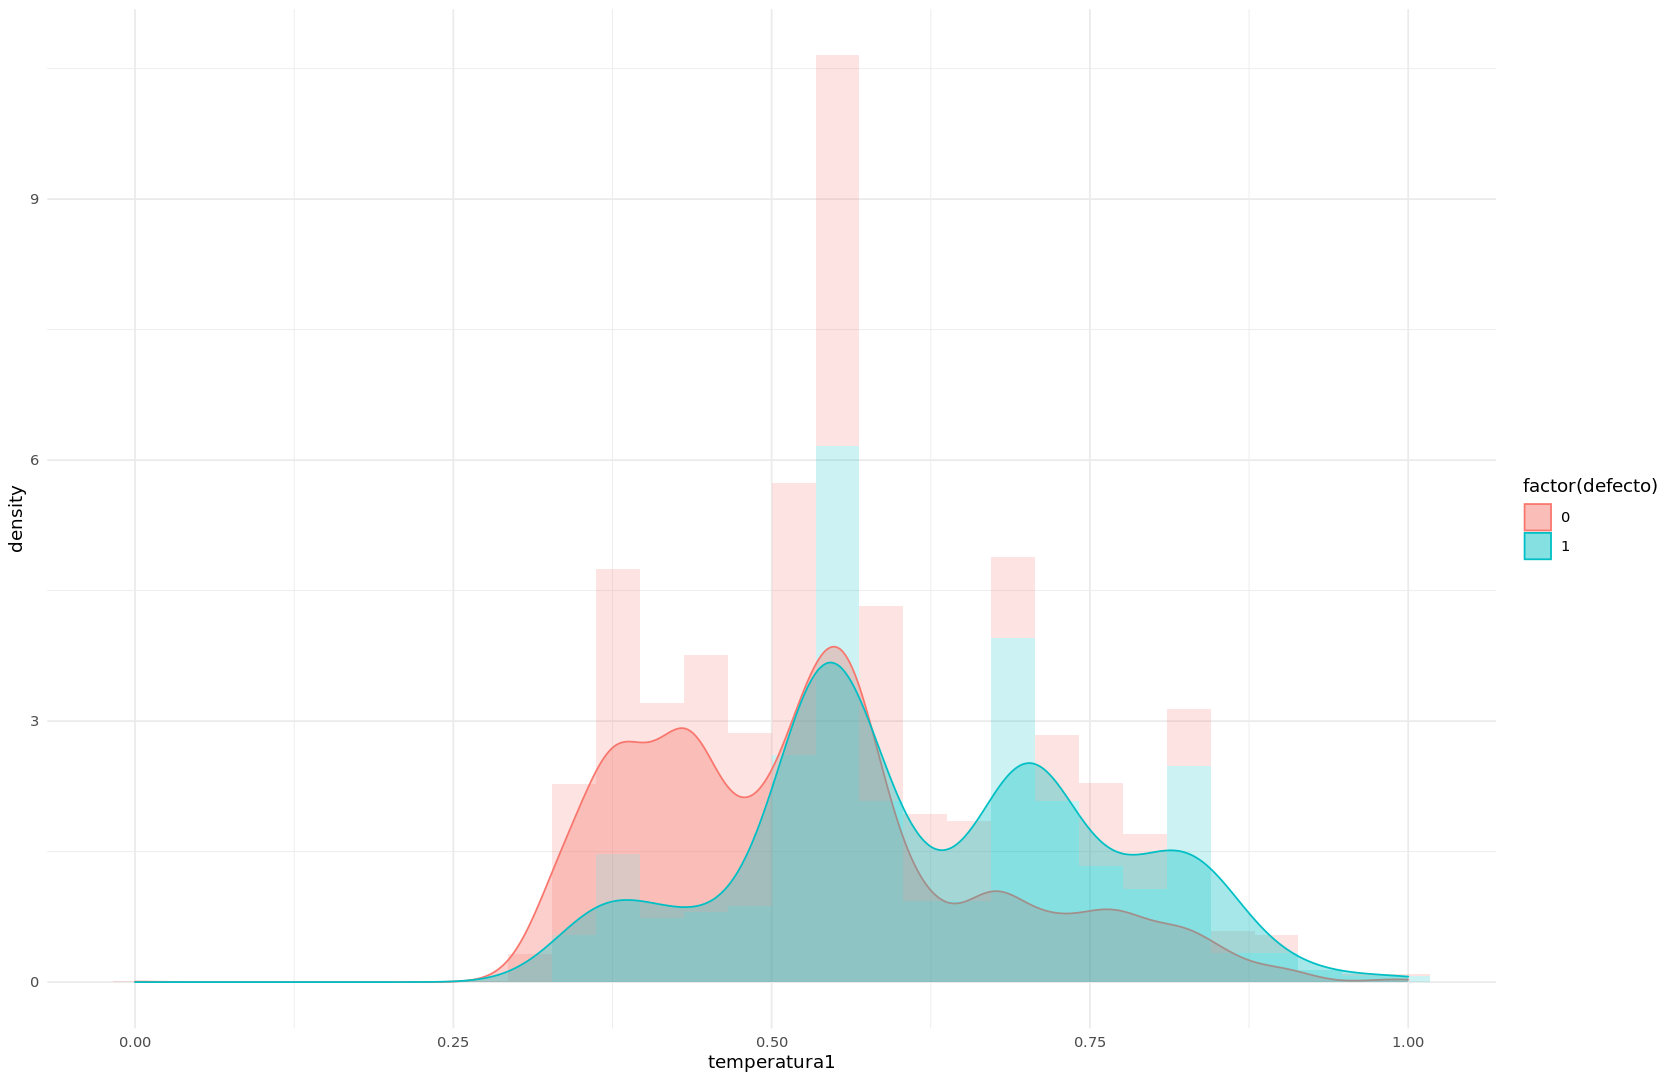

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



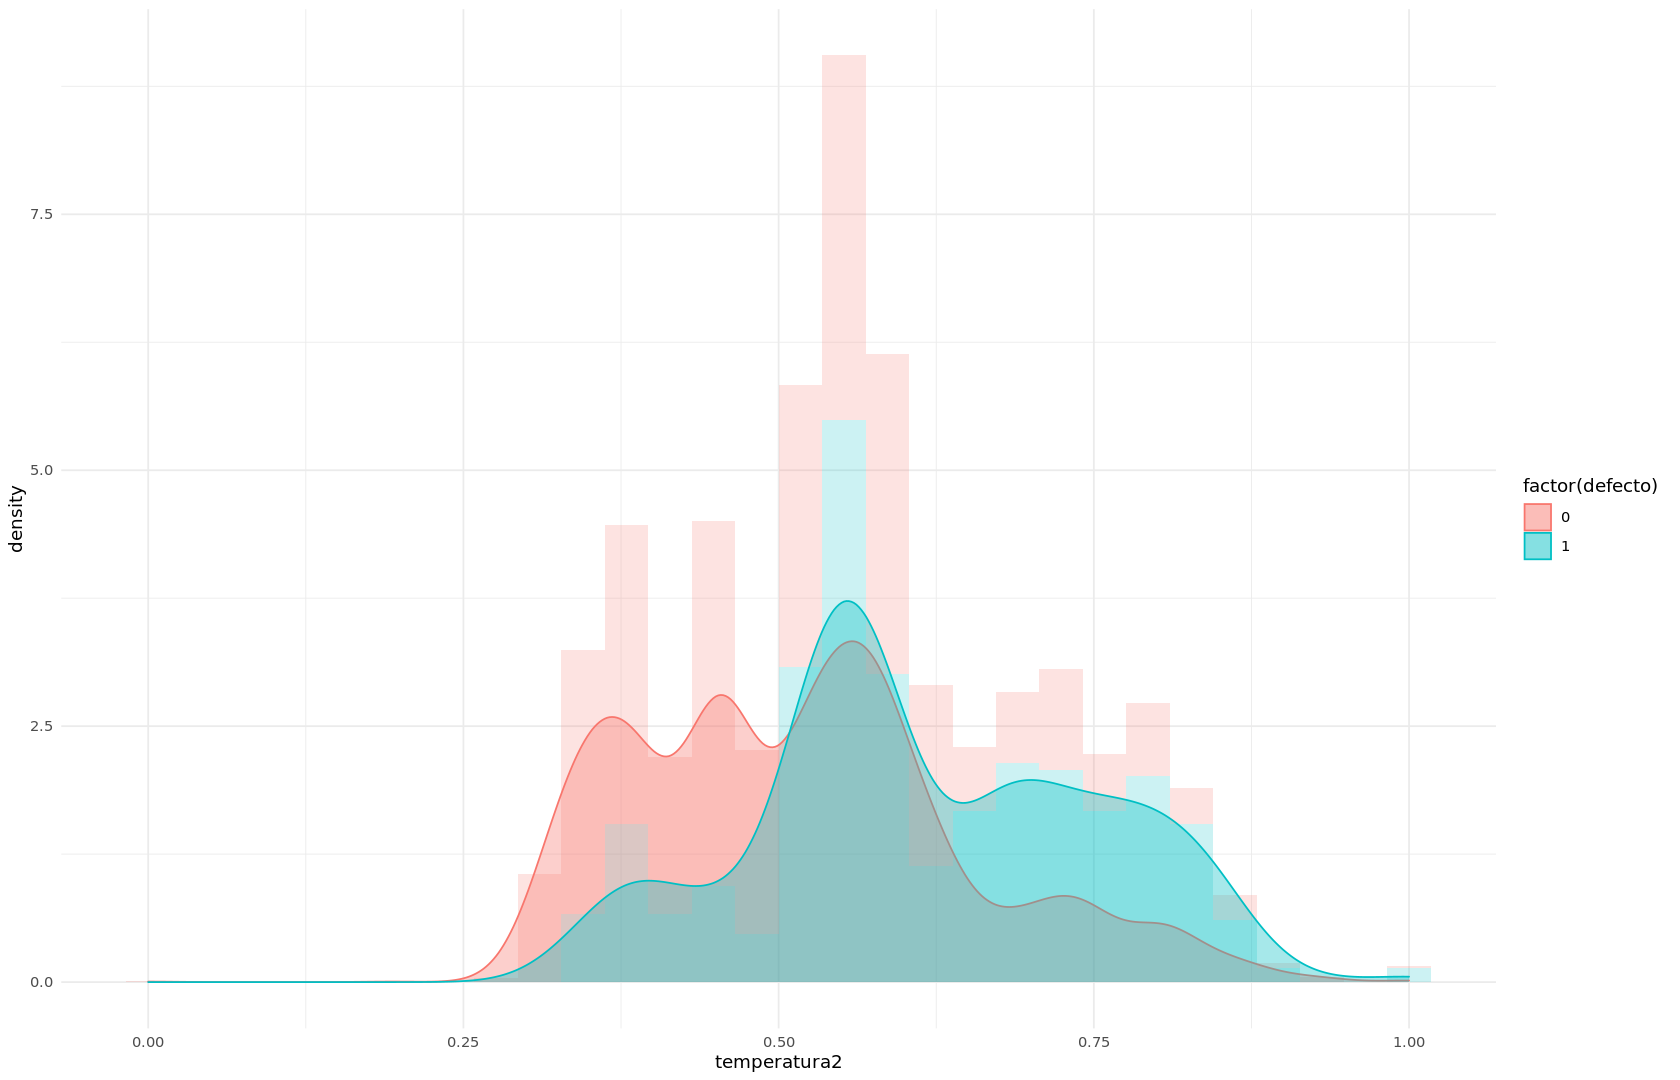

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



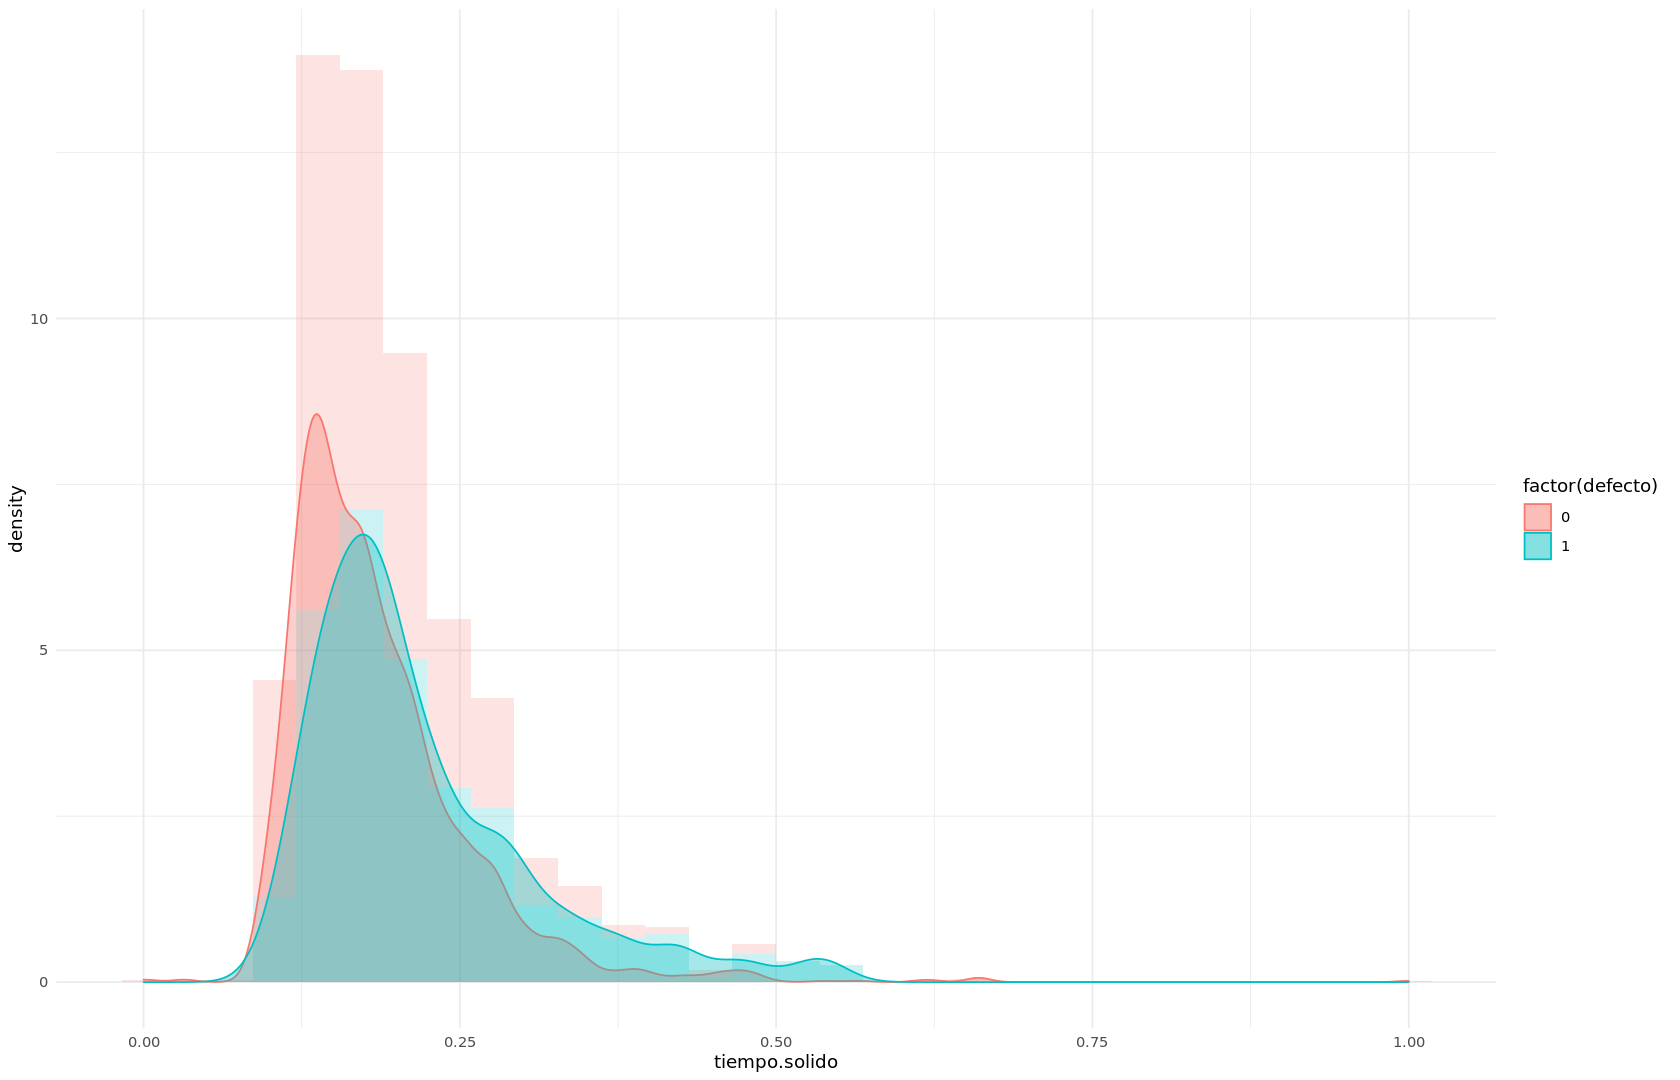

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



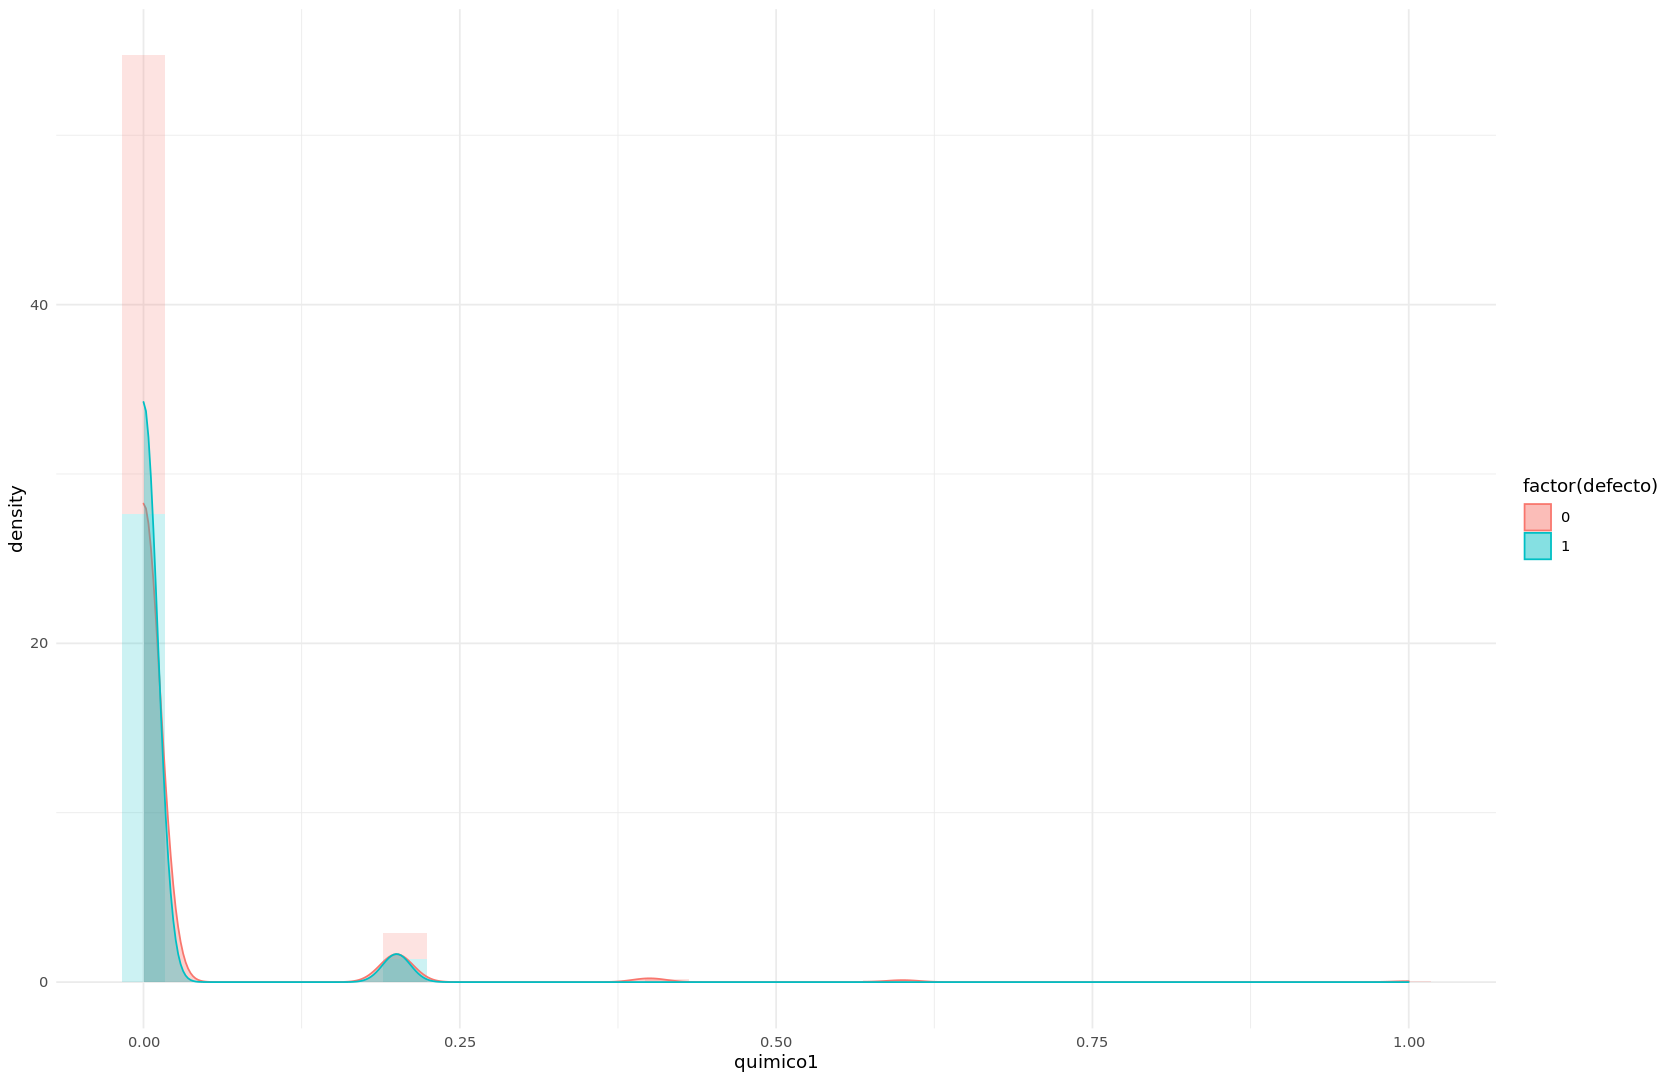

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



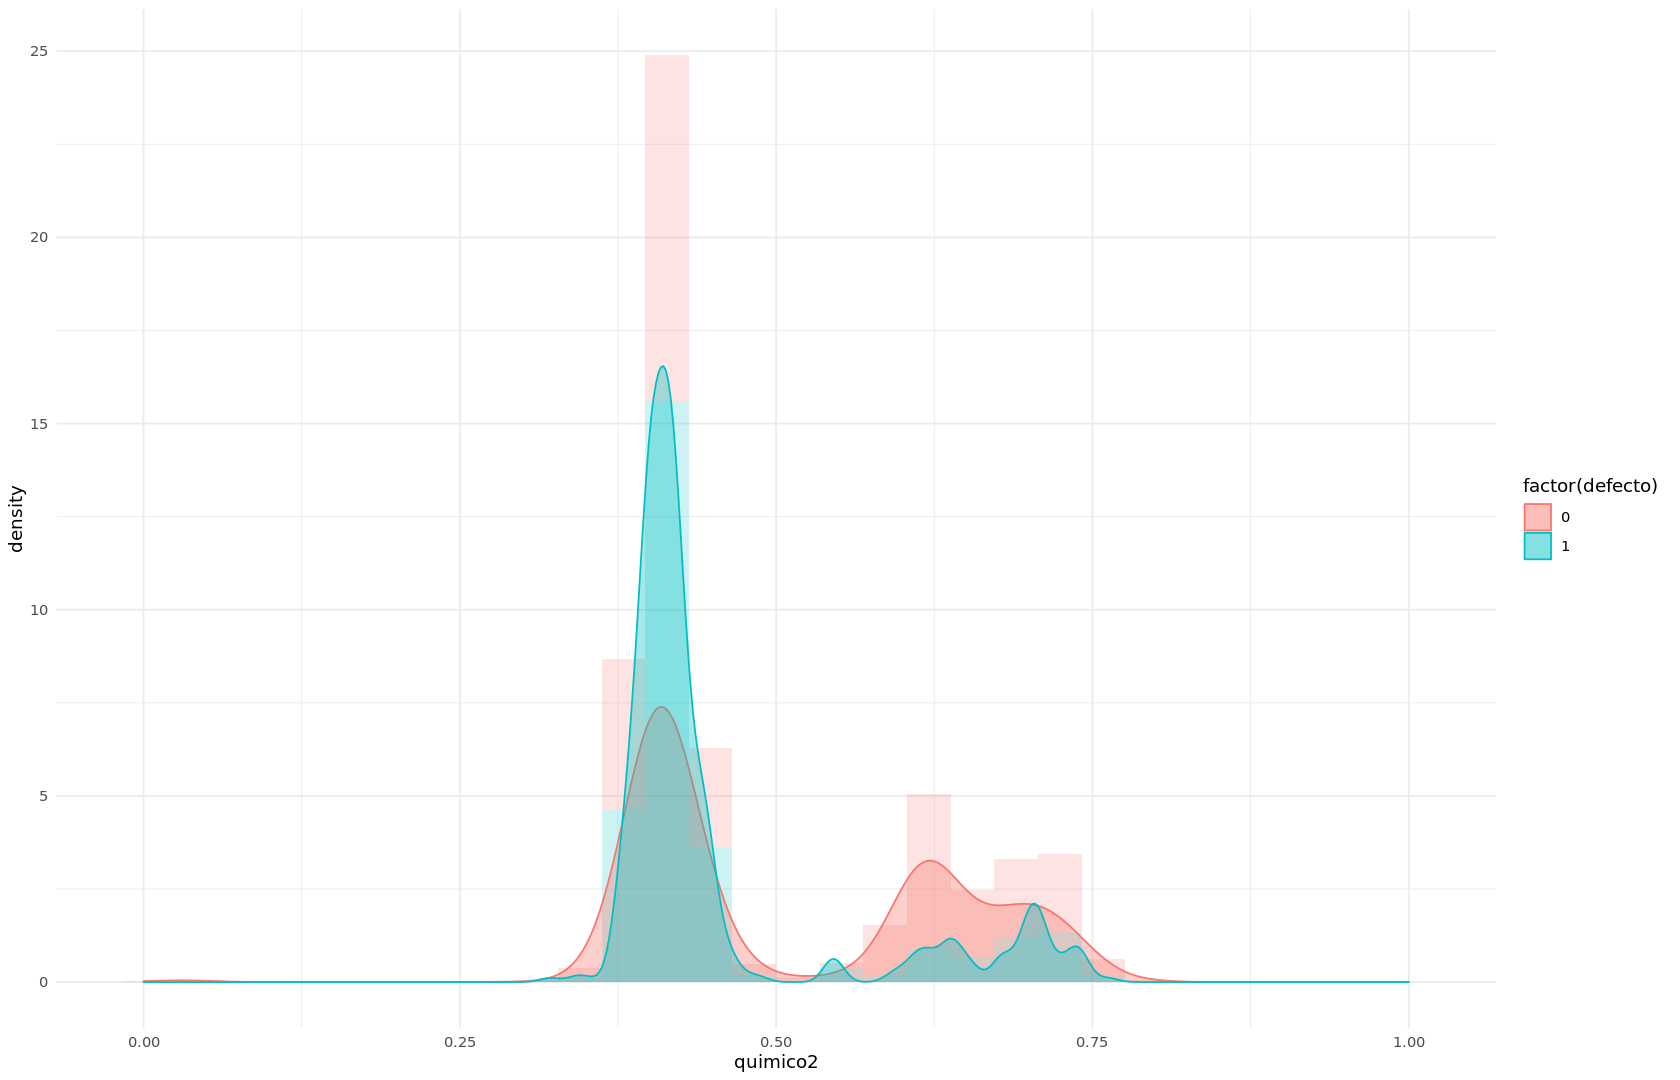

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



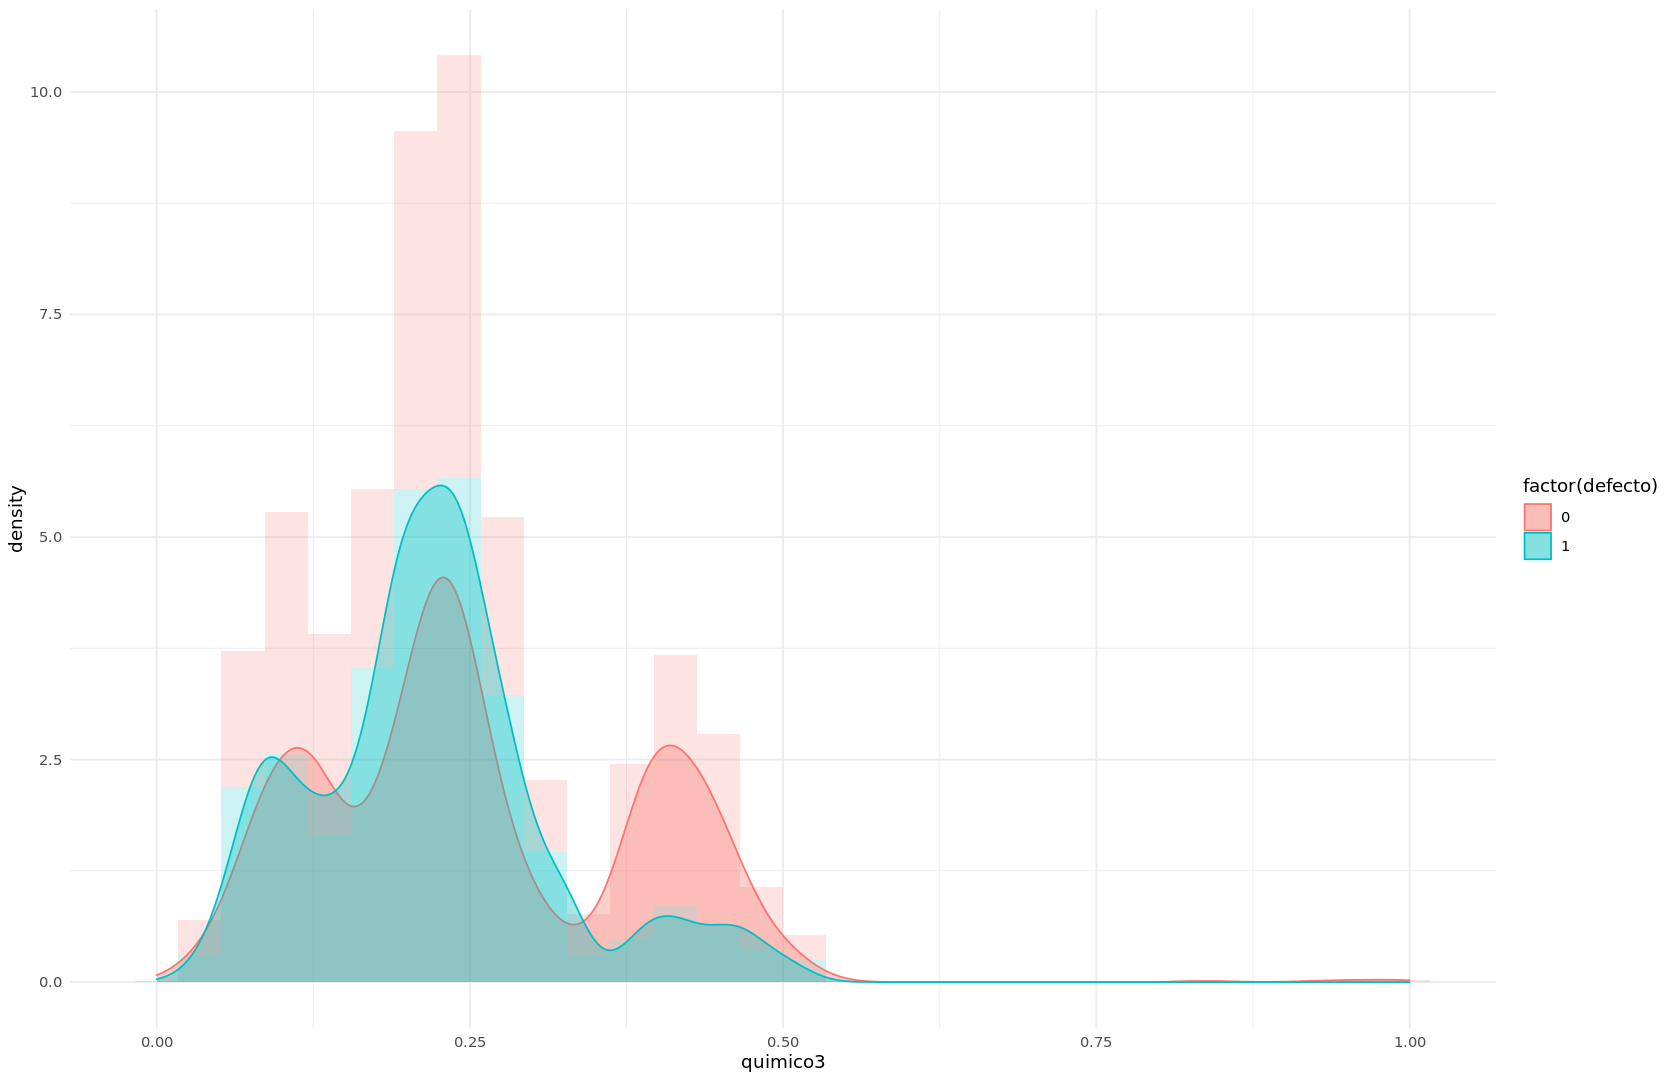

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



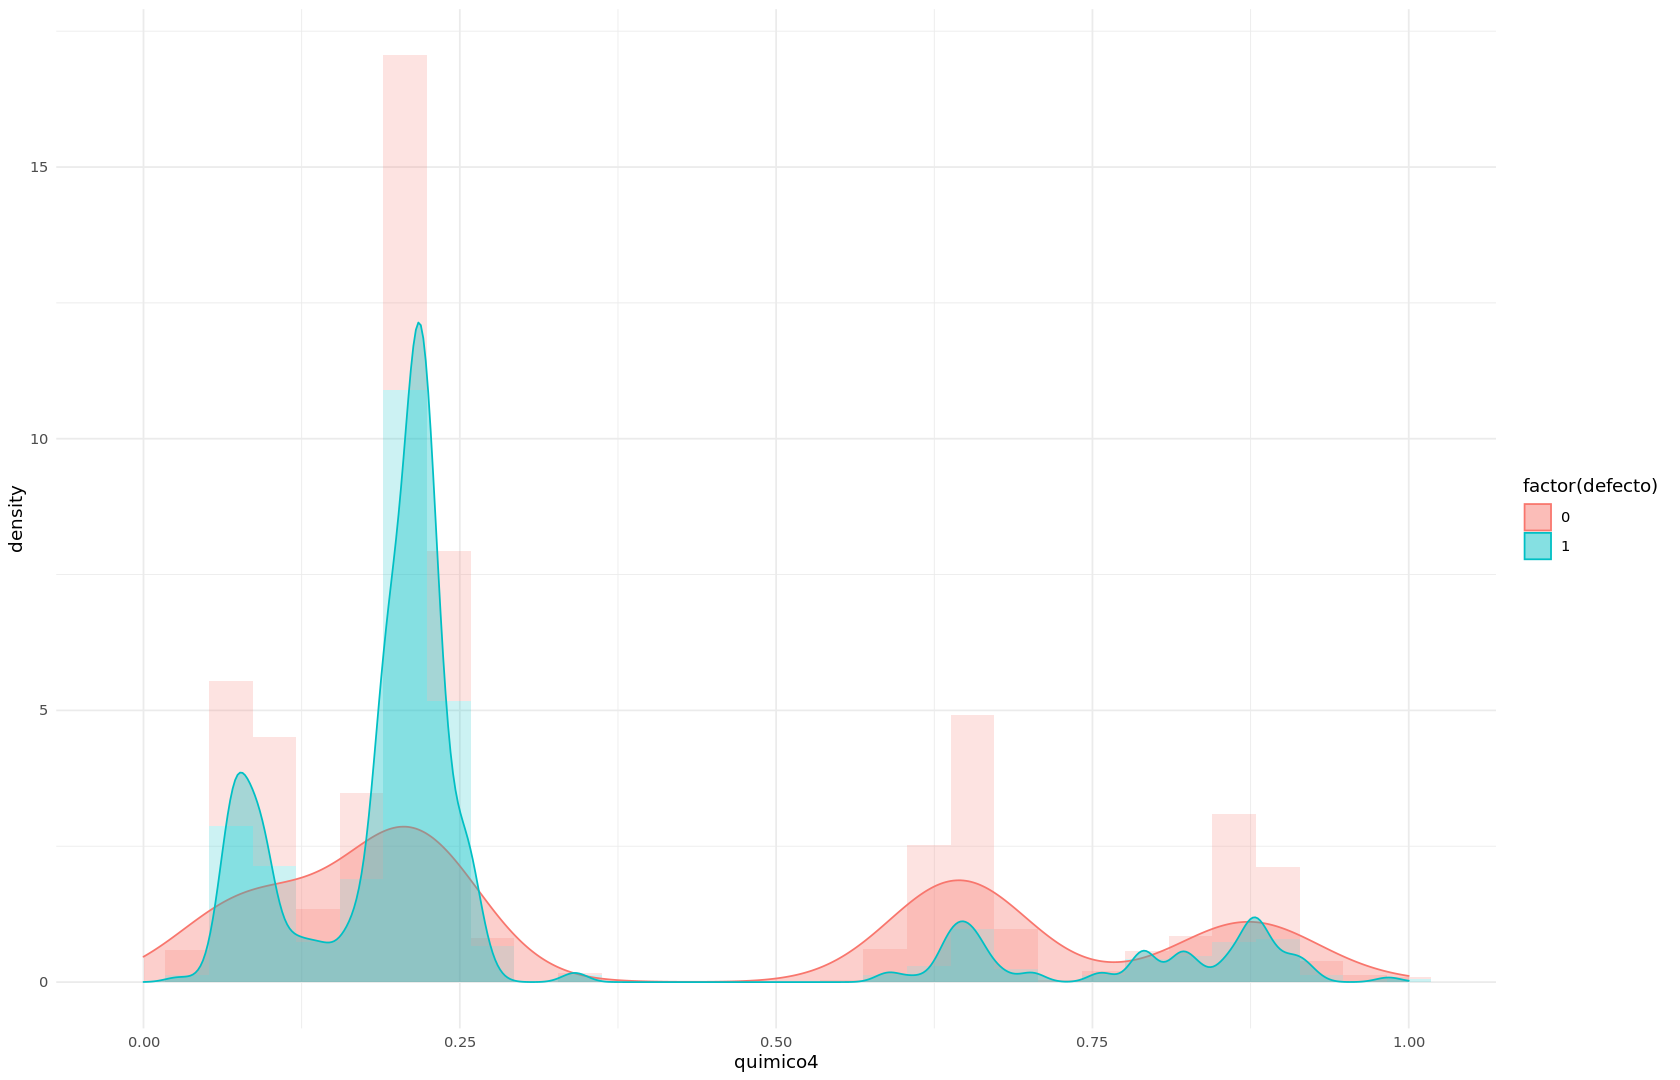

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



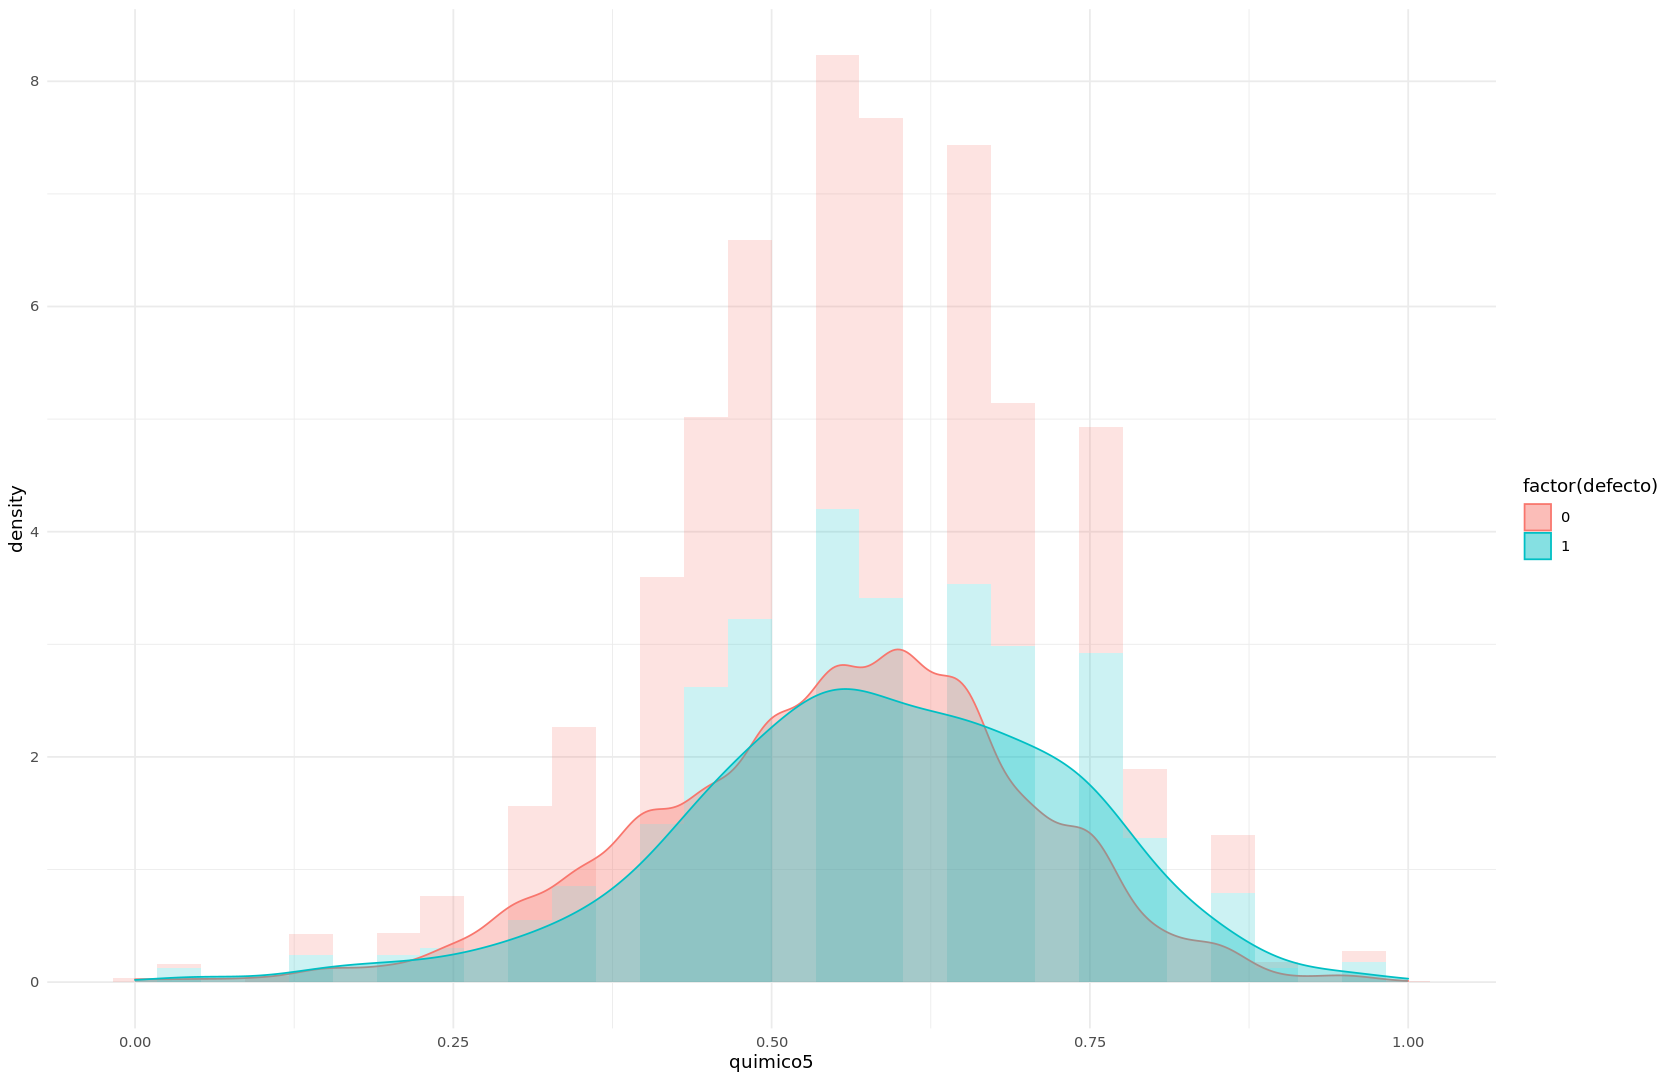

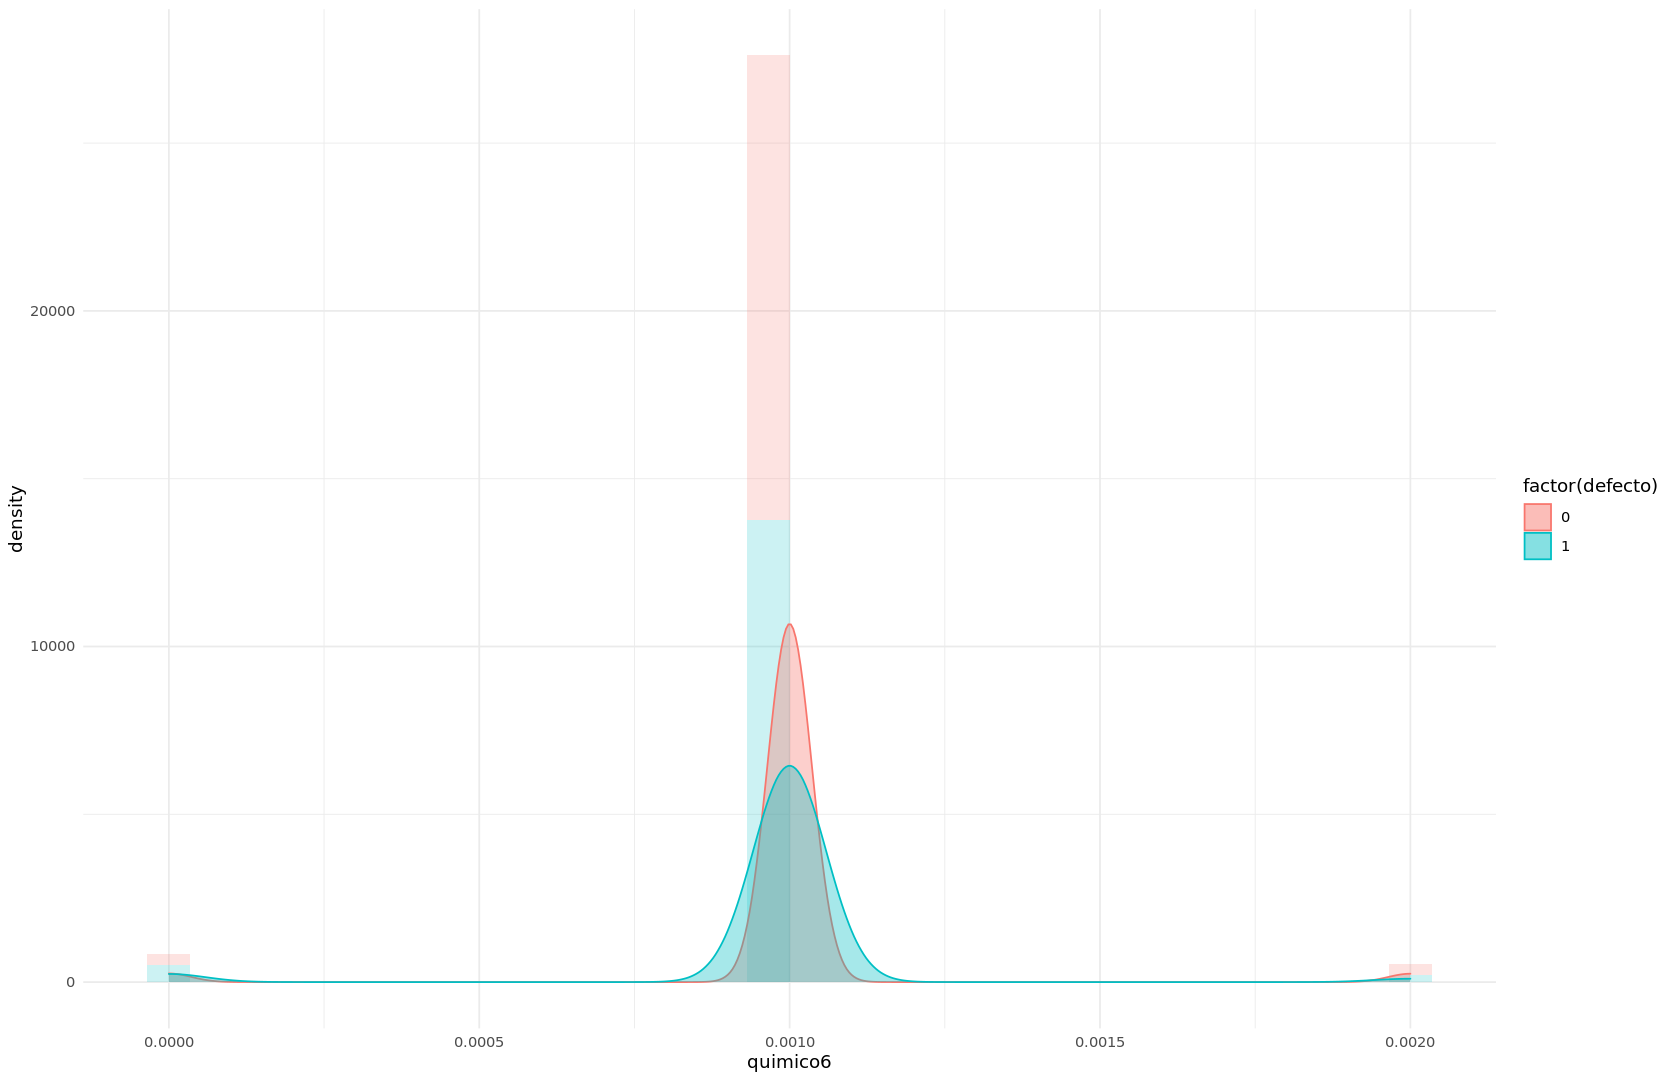

In [5]:
options(repr.plot.width=14, repr.plot.height=9)

for (i in 1:19){
    p <- ggplot(data)
    p <- p + geom_histogram(aes(x=data[,i], y=..density.., fill=factor(defecto)), alpha = 0.2)
    p <- p + geom_density(aes(x=data[,i], y =..density.., fill = factor(defecto), colour = factor(defecto)), alpha = 0.35)
    p <- p + scale_x_continuous(name = names(data)[i])
    p <- p + theme_minimal()
    print(p)
}

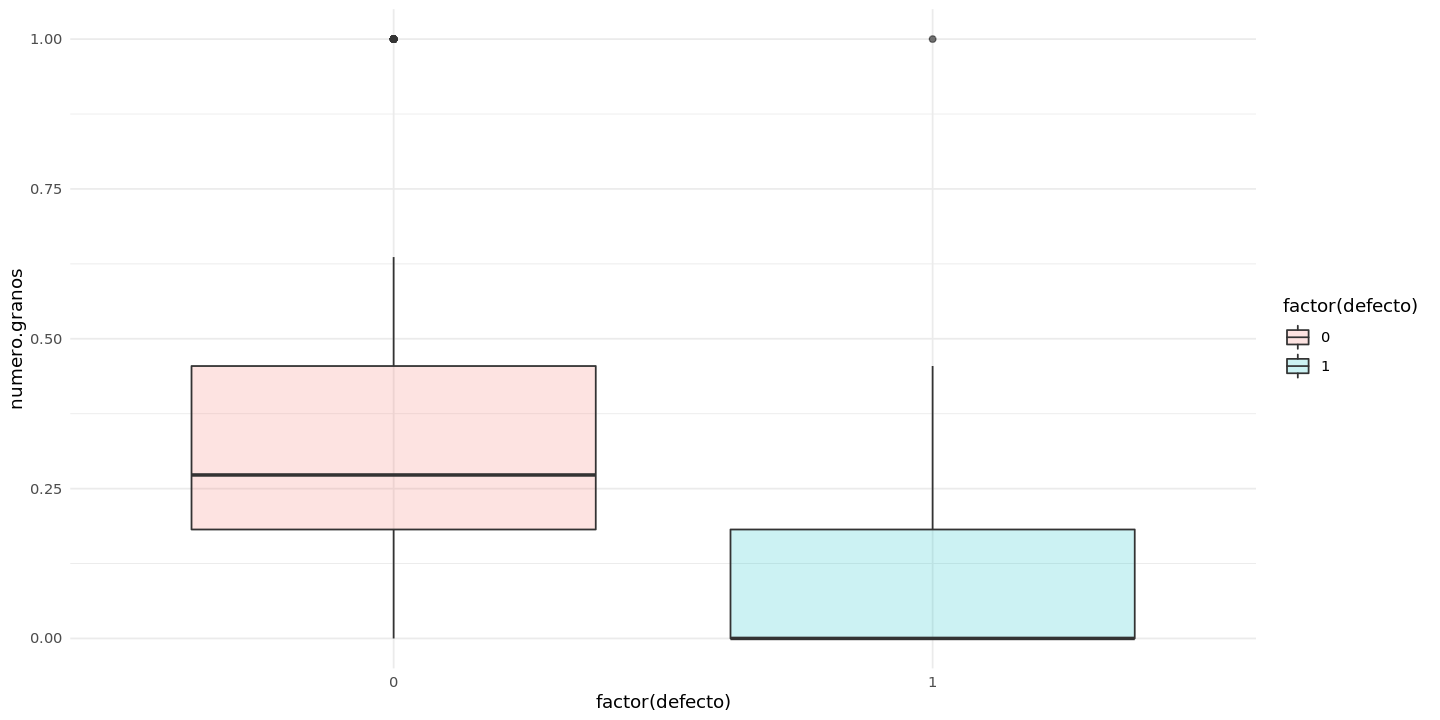

Warning message:
“Removed 1 rows containing non-finite values (stat_boxplot).”


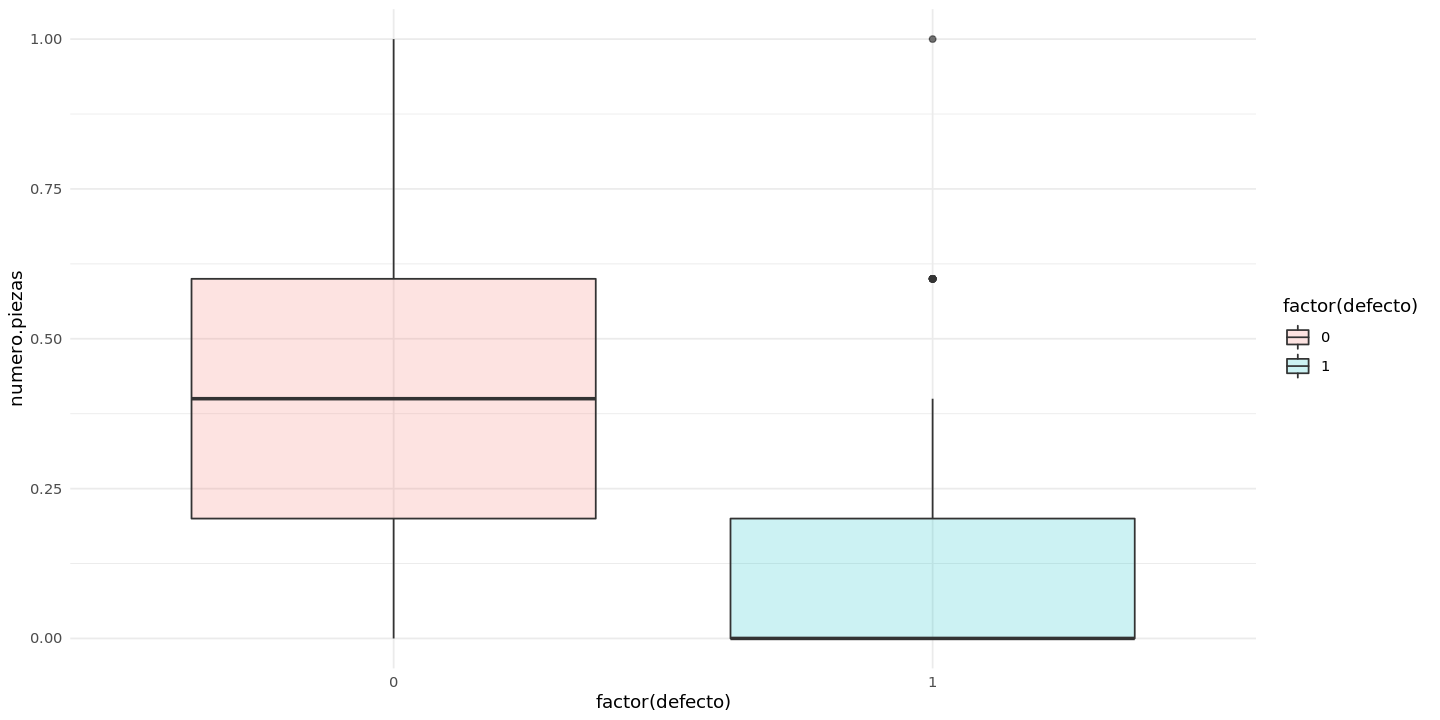

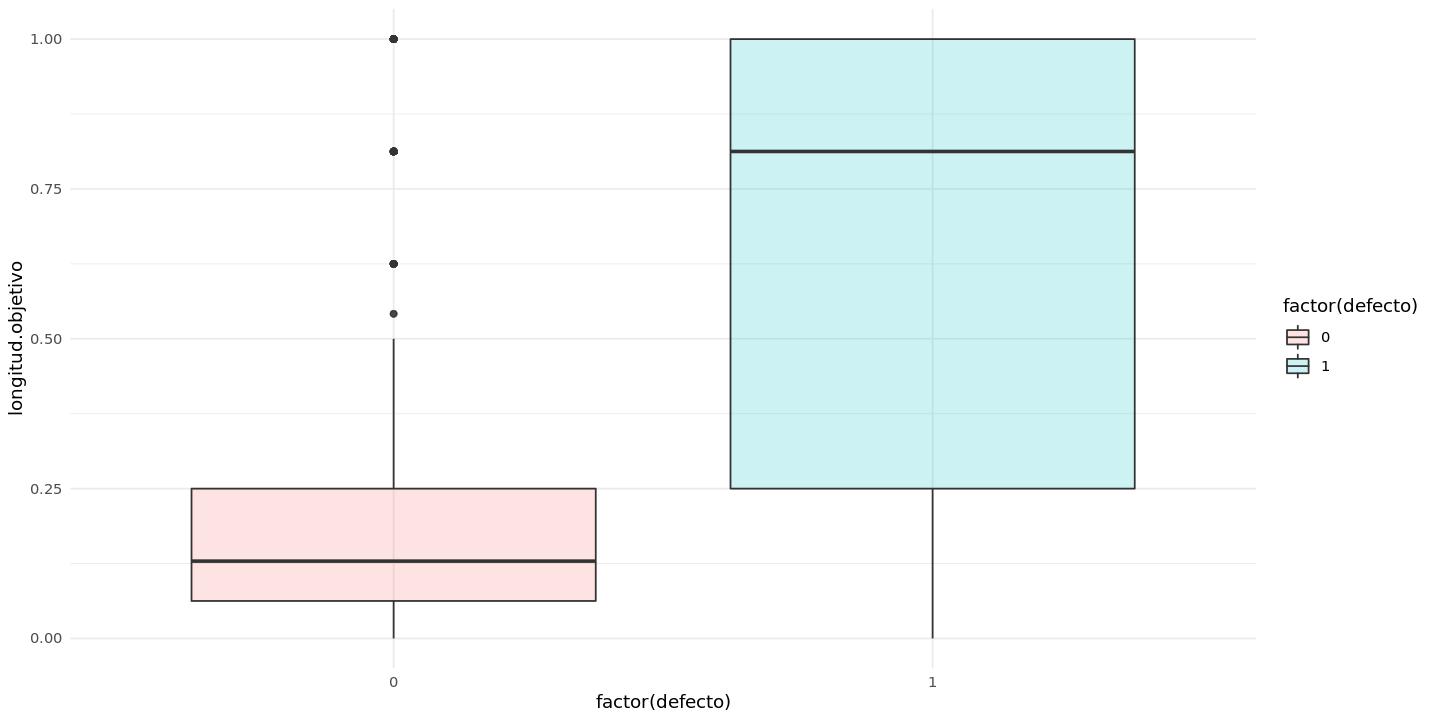

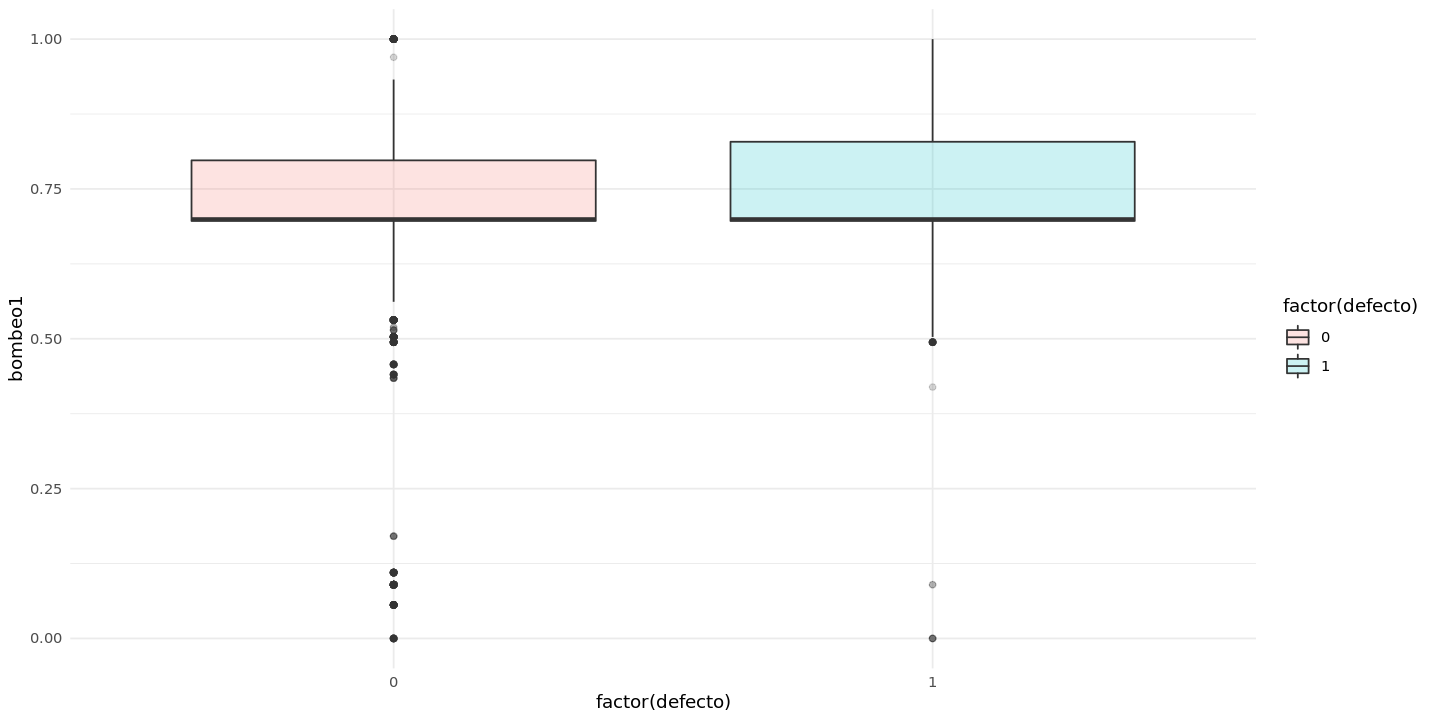

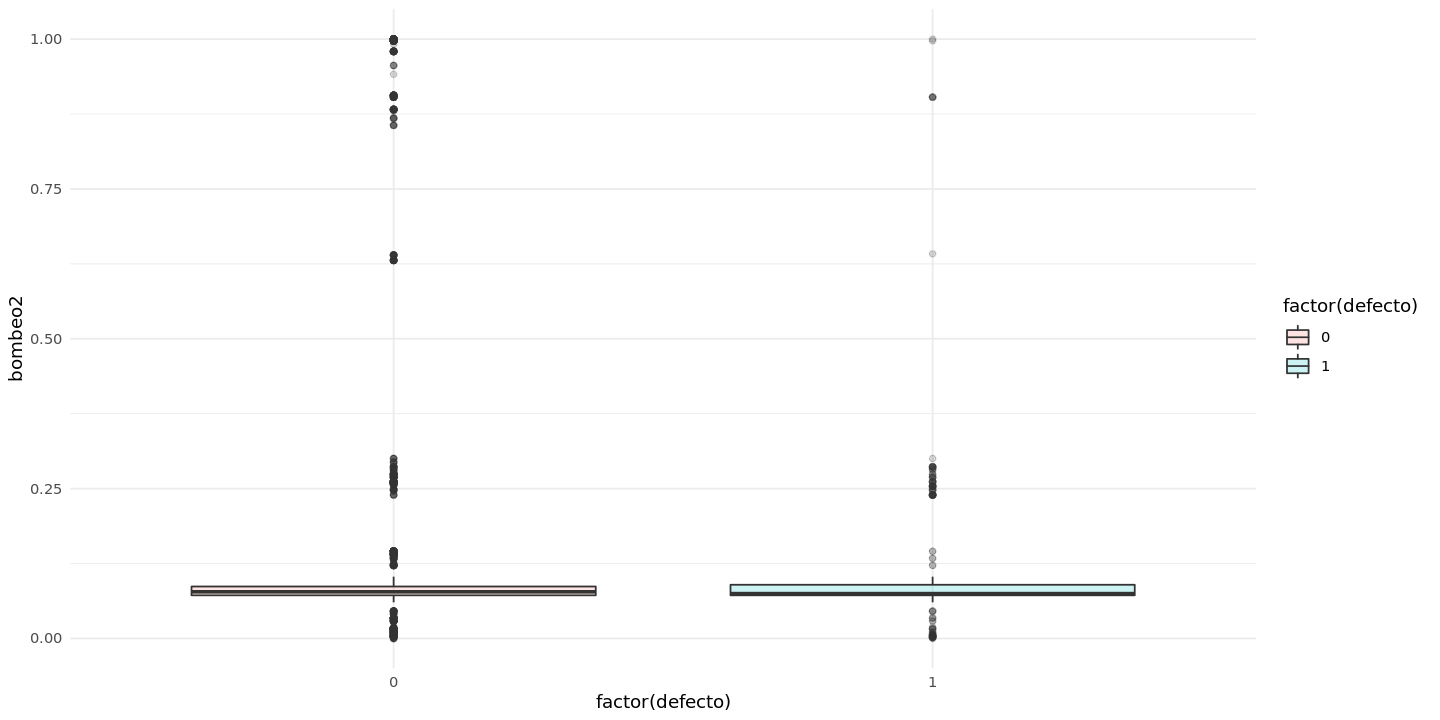

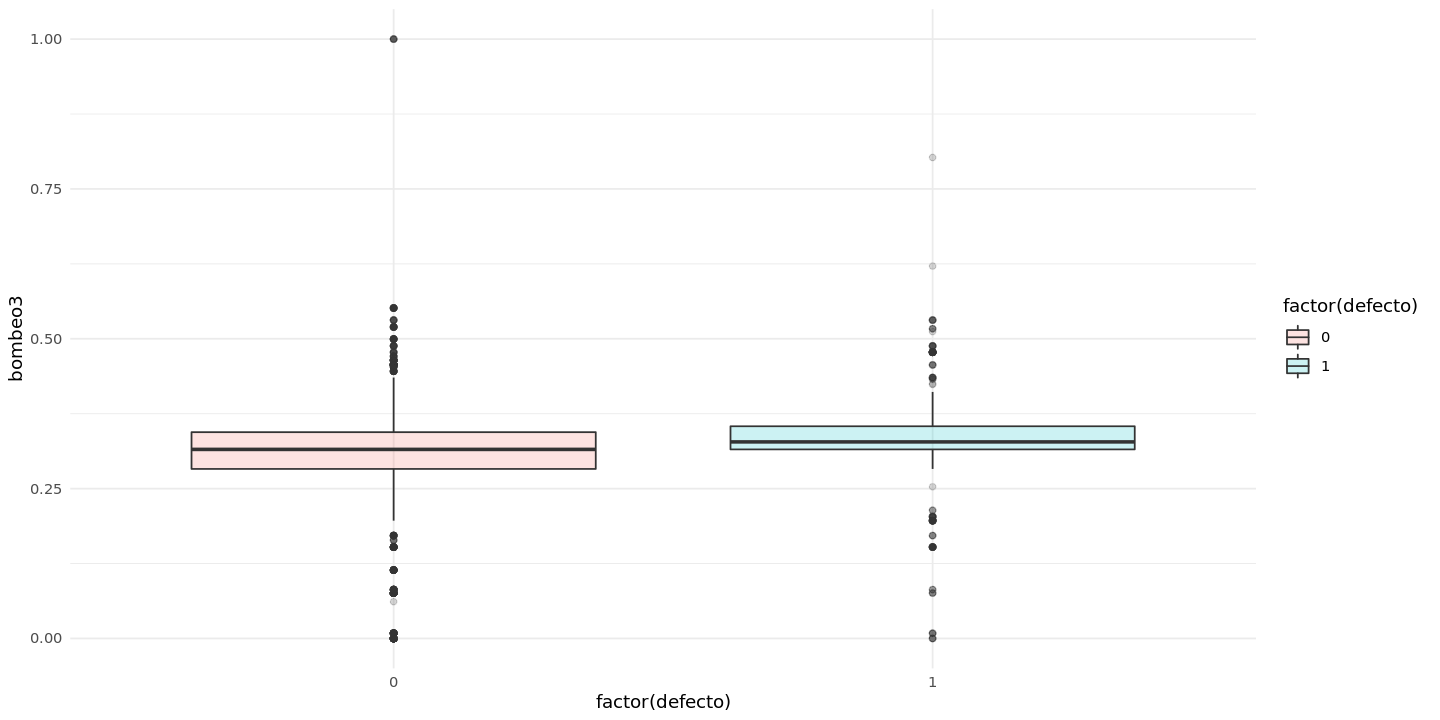

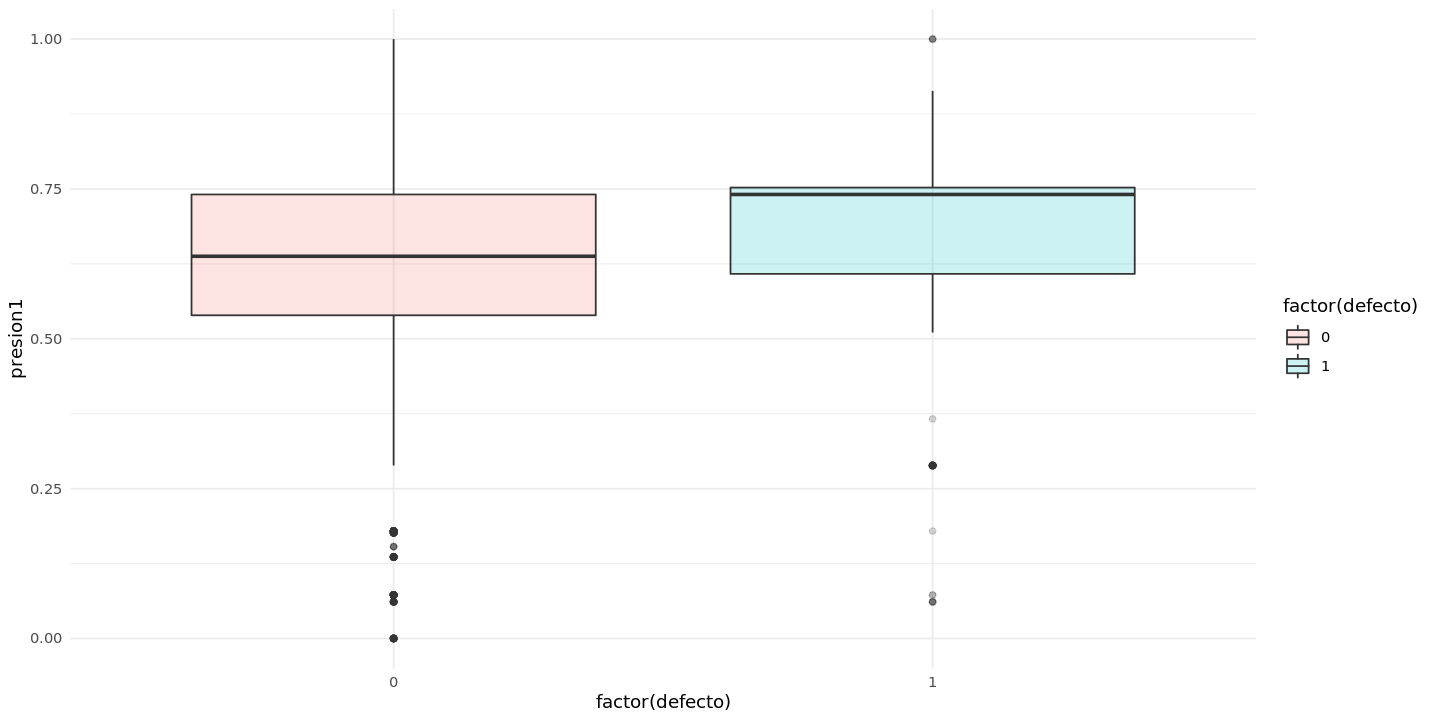

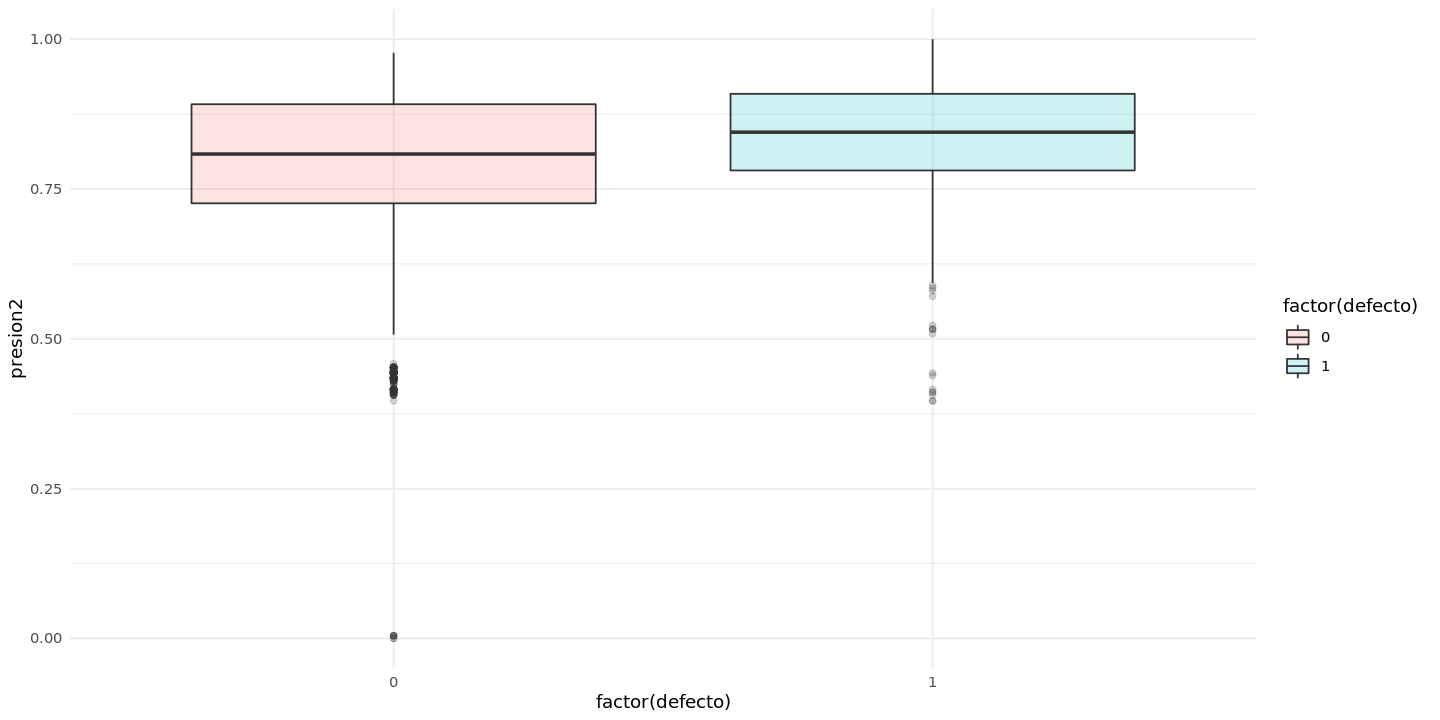

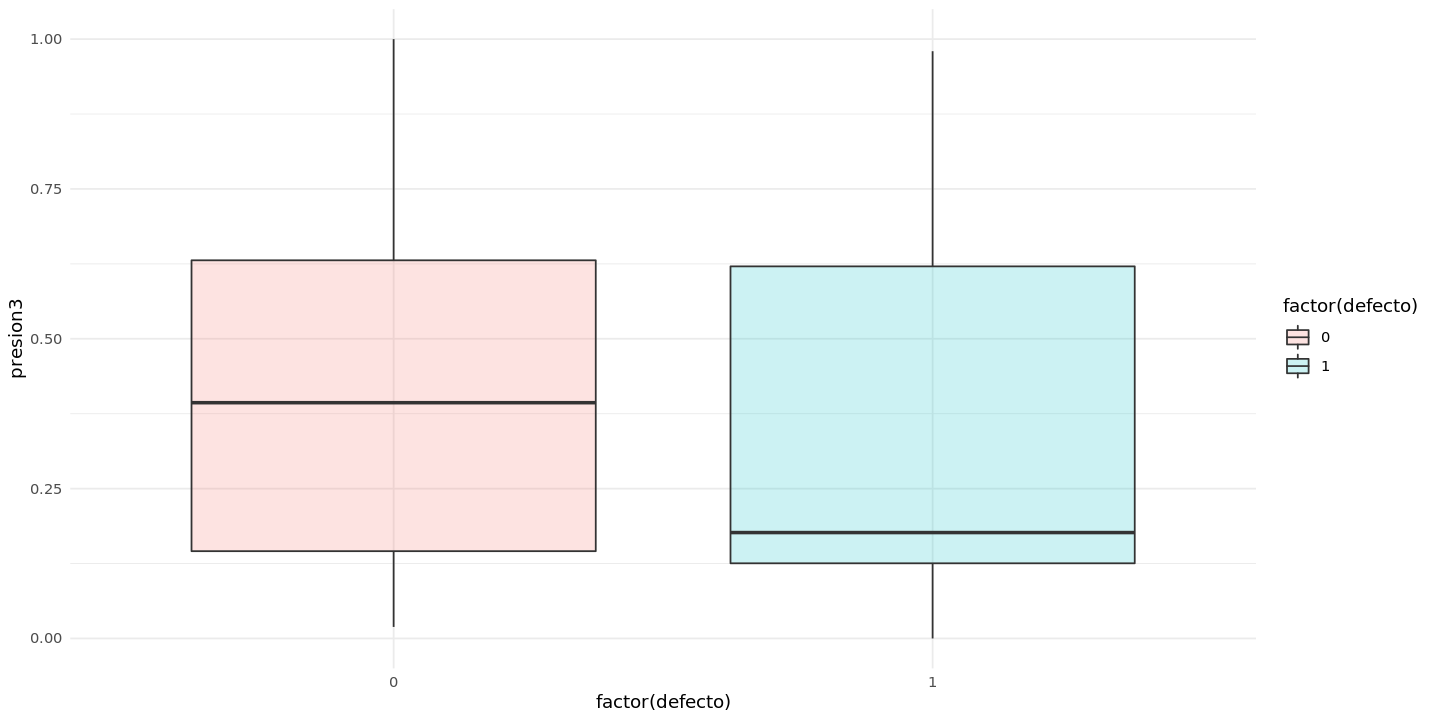

Warning message:
“Removed 1137 rows containing non-finite values (stat_boxplot).”


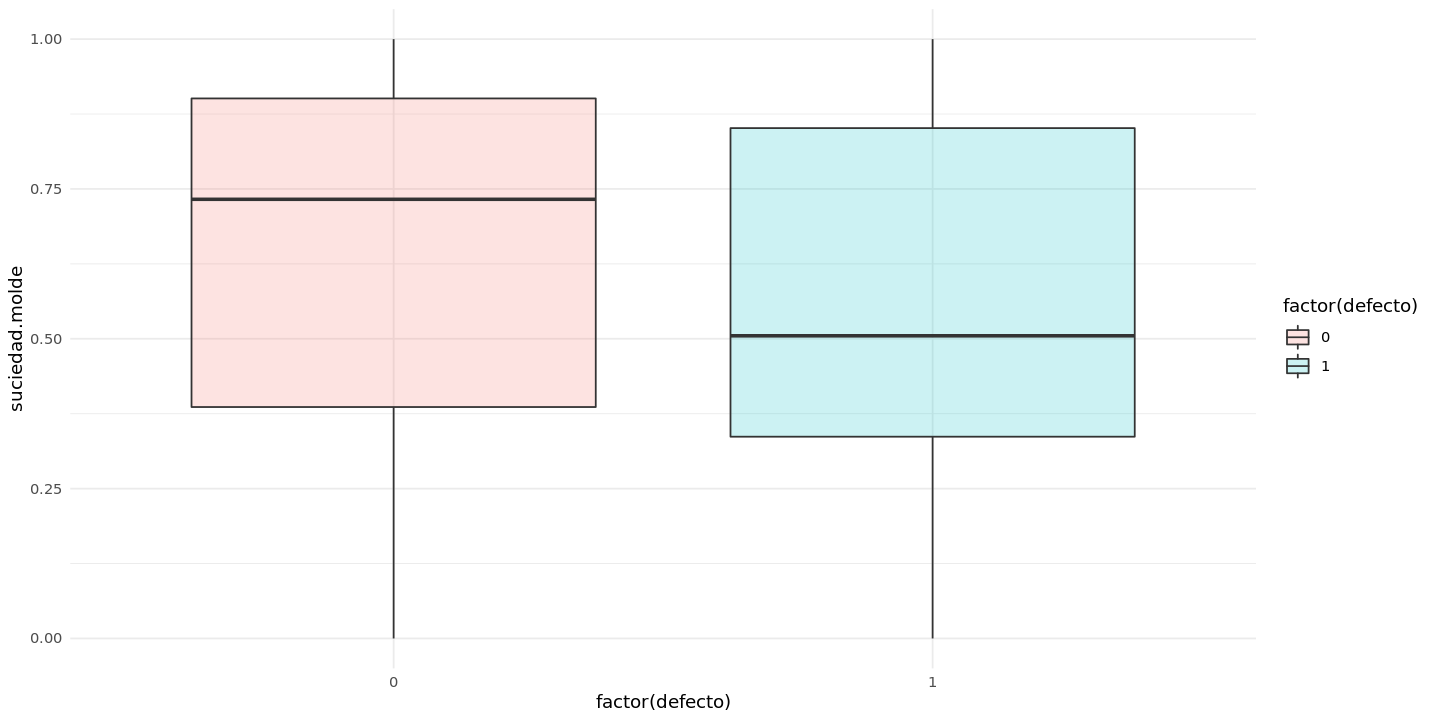

Warning message:
“Removed 1137 rows containing non-finite values (stat_boxplot).”


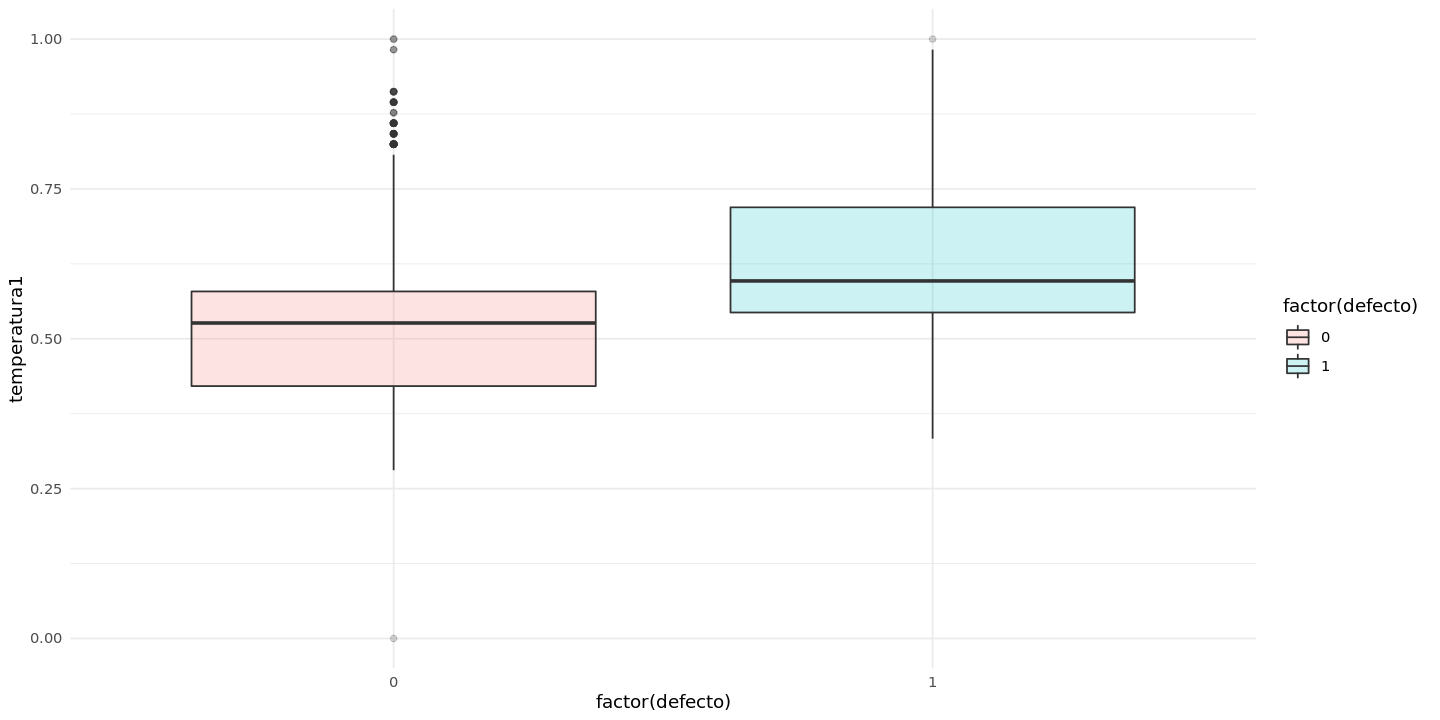

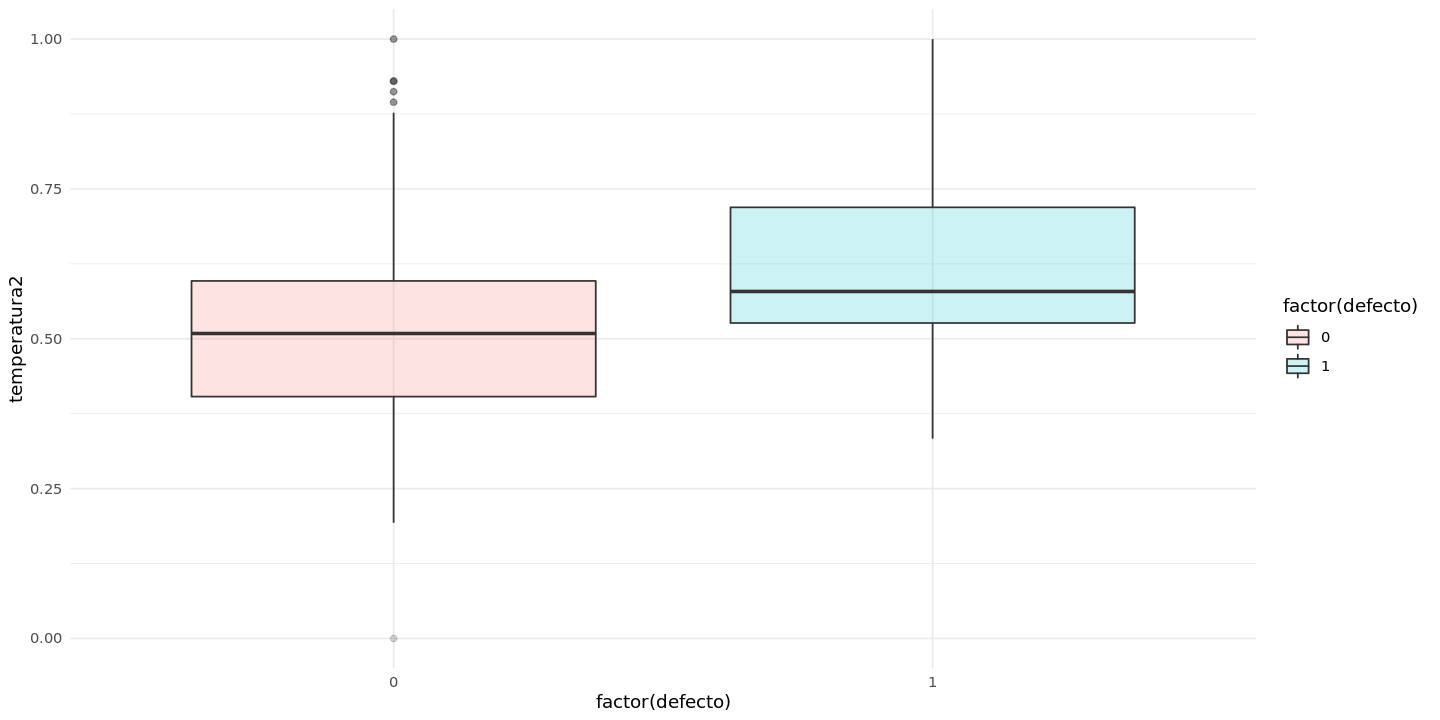

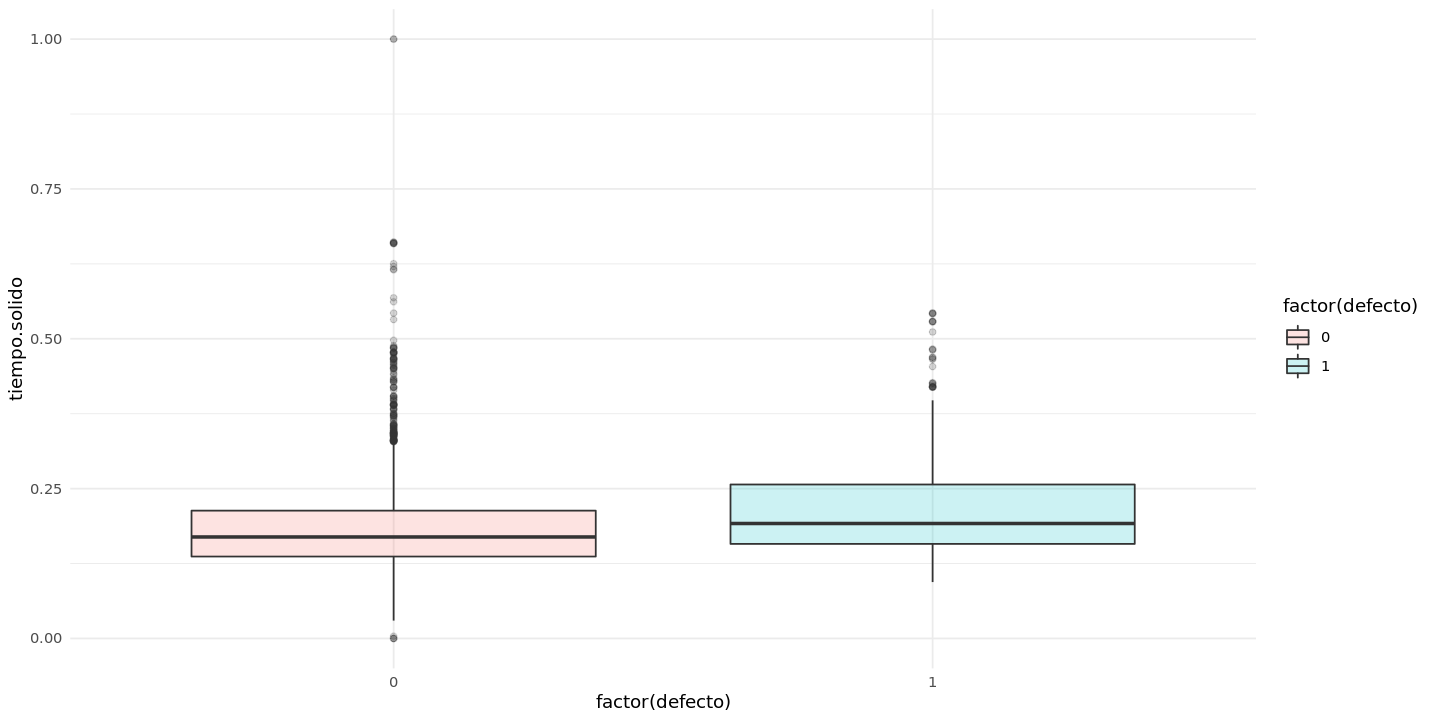

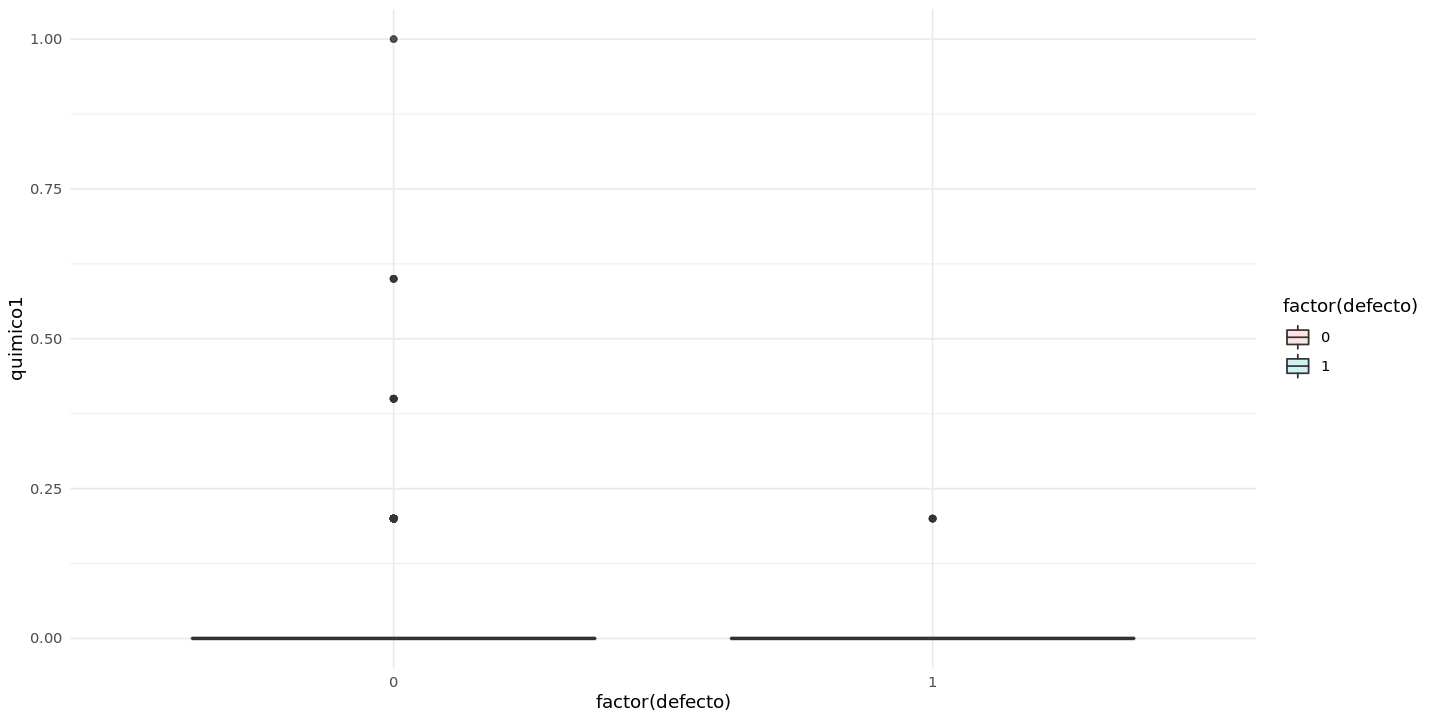

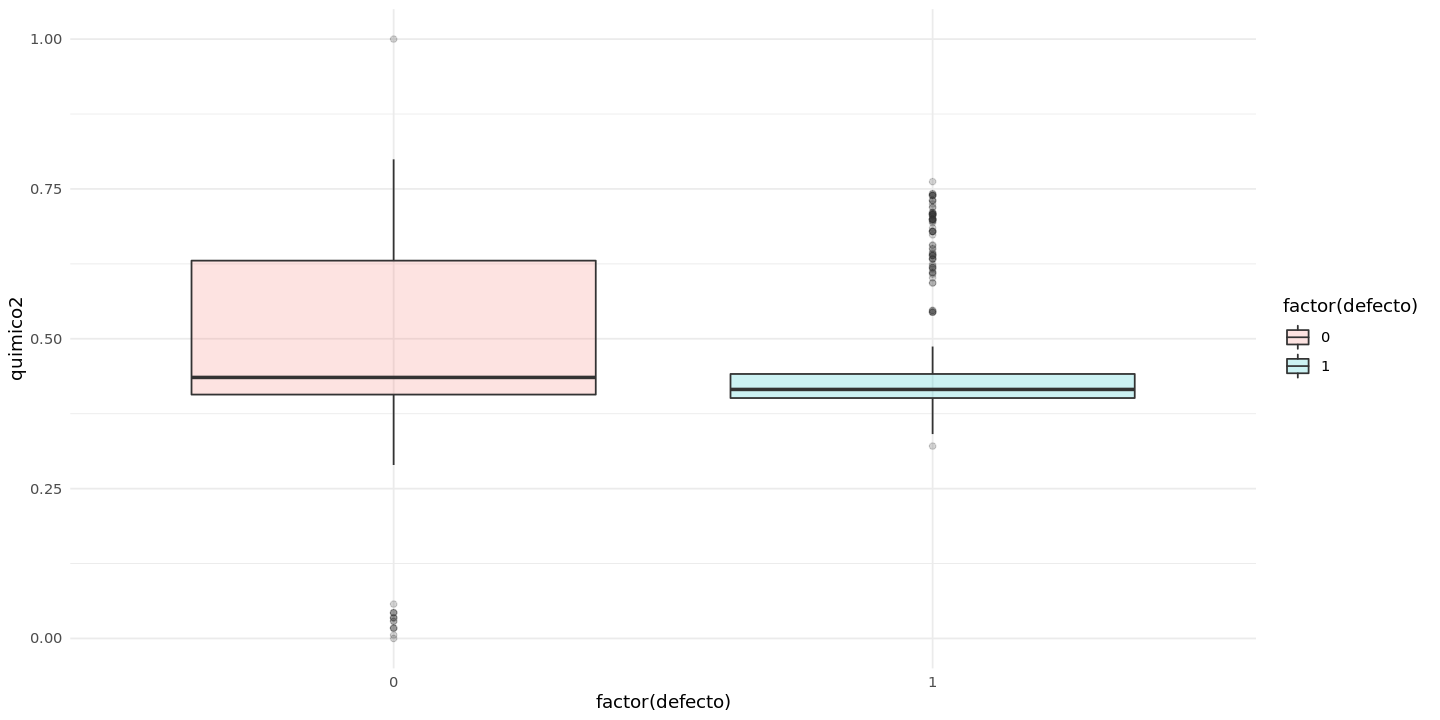

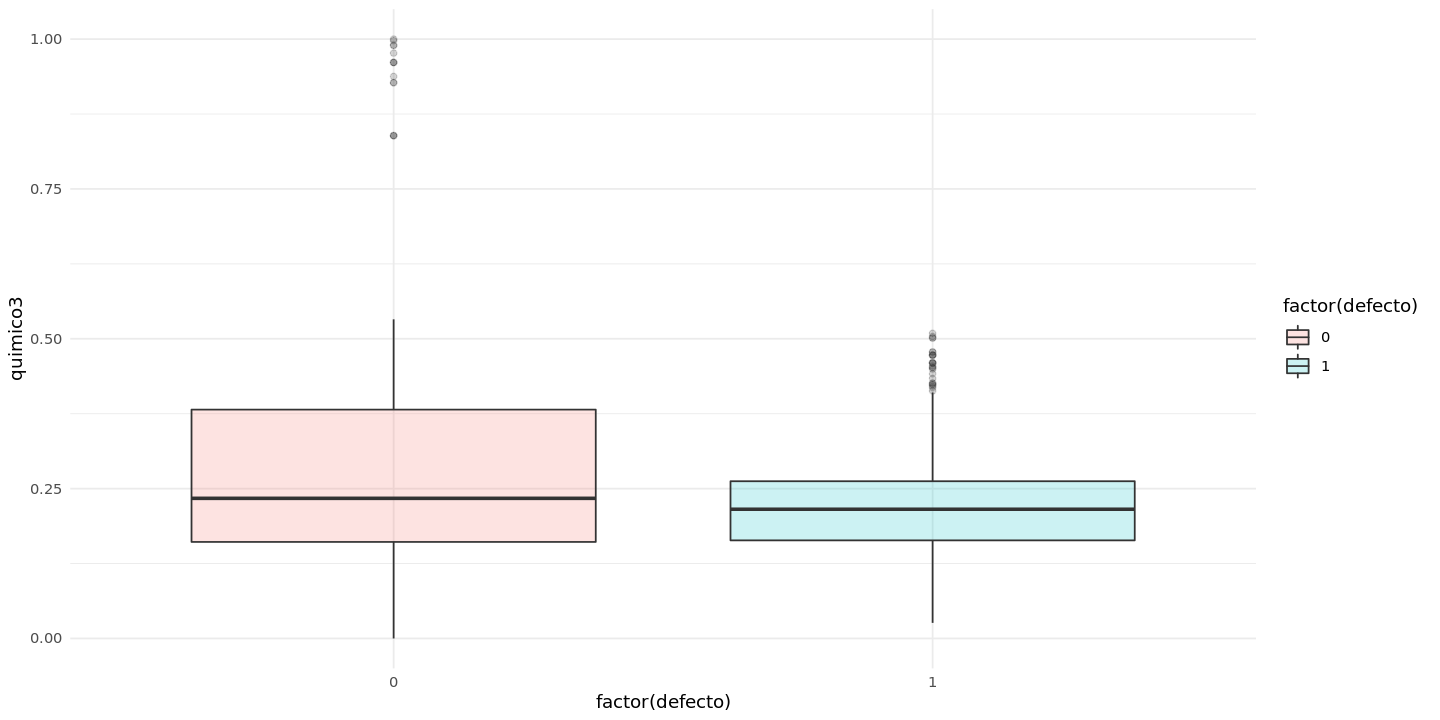

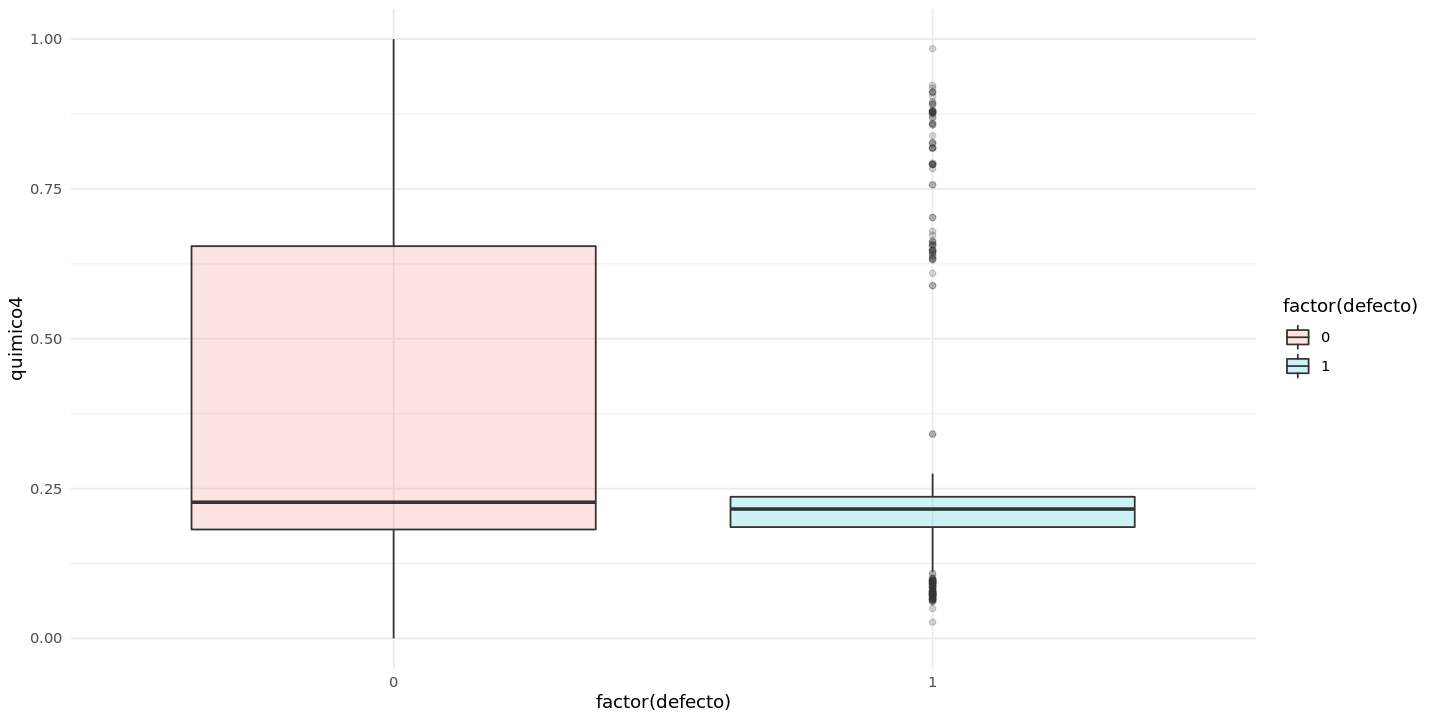

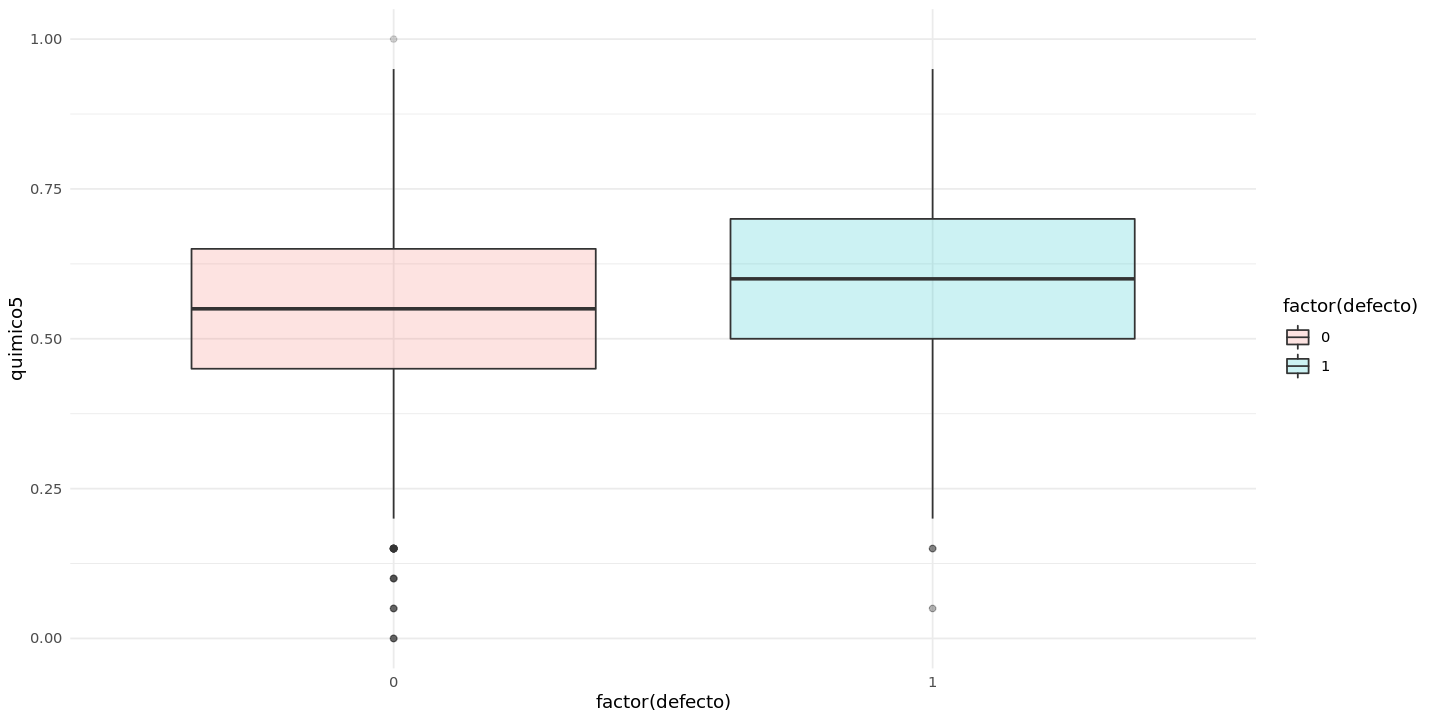

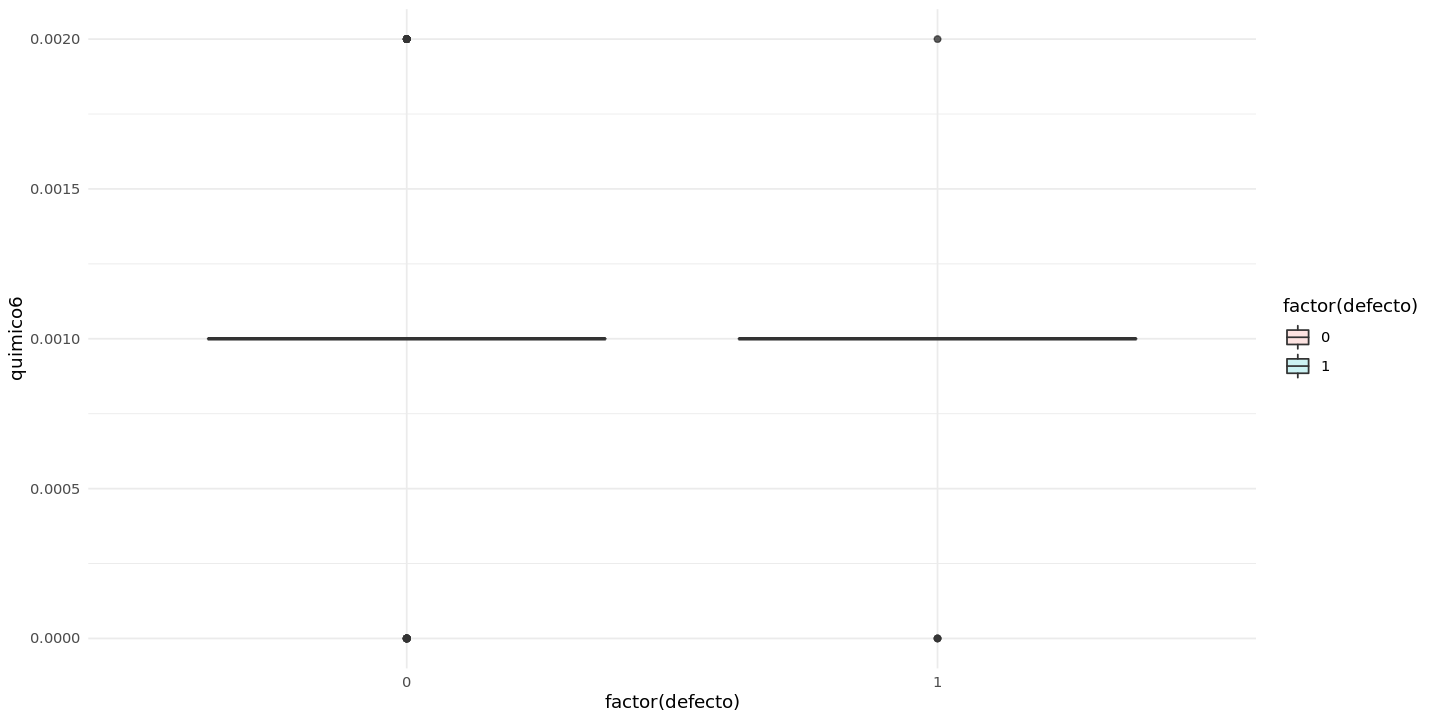

In [6]:
# Outliers
options(repr.plot.width=12, repr.plot.height=6)

for (i in 1:19){
    p <- ggplot(data)
    p <- p + geom_boxplot(aes(x=factor(defecto), y=data[,i], fill=factor(defecto)), alpha = 0.2)
    p <- p + scale_y_continuous(name = names(data)[i])
    p <- p + theme_minimal()
    print(p)
    cat('\n')
    cat('\n')
    cat('\n')
    cat('\n')
}

In [7]:
# quimico6 parece que es casi siempre 0.0010
table(data$quimico6)


    0 0.001 0.002 
  121  4771   108 

## BLOQUE 3: limpieza
Algunos aspectos a tratar son:
* Ausencias -> eliminaremos filas que no estén completas
* Baja varianza -> no trabajaremos con variables con sd < 0.005

Al final de la limpieza exportamos el fichero como `dataPrepared.csv`.

In [8]:
# Eliminamos ausencias
data <- data[complete.cases(data),]
cat("El fichero es un", class(data),"de", nrow(data), "filas y", ncol(data), "columnas.")

# Eliminamos variables con baja varianza (quimico9)
sd.vector <- apply(data, 2, sd, na.rm = TRUE)
vars.toDrop <- names(sd.vector[sd.vector< 0.005])
data <- data[, (names(data) %in% vars.toDrop) == FALSE]

El fichero es un data.frame de 3862 filas y 20 columnas.

In [9]:
head(data)
write.csv(data, file = "dataPrepared.csv", row.names=FALSE)

,numero.granos,numero.piezas,longitud.objetivo,bombeo1,bombeo2,bombeo3,presion1,presion2,presion3,suciedad.molde,temperatura1,temperatura2,tiempo.solido,quimico1,quimico2,quimico3,quimico4,quimico5,defecto
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,0.1818182,0.2,0.2500000,0.6965610,0.07782671,0.31543624,0.6543779,0.8219178,0.5803842,0.00990099,0.5614035,0.5789474,0.1339973,0,0.4126074,0.2077922,0.1840909,0.55,0
4,1.0000000,1.0,0.0000000,0.6223871,0.02907488,0.00000000,0.7119816,0.5086758,0.1051567,0.73267327,0.3684211,0.3859649,0.1936860,0,0.6991404,0.2077922,0.8909091,0.55,0
6,0.0000000,0.0,0.8125000,0.8651382,0.07782671,0.41131352,0.7119816,0.8082191,0.6031345,0.60396040,0.6140351,0.5263158,0.5113145,0,0.4097421,0.2025974,0.2045455,0.45,1
7,0.0000000,0.0,1.0000000,0.8334457,0.07488984,0.43336529,0.6889401,0.9196348,0.1496461,0.70297030,0.8947368,0.9298246,0.1556628,0,0.4269341,0.1376623,0.1022727,0.55,0
8,0.1818182,0.4,0.1354167,0.7302765,0.14243760,0.20325983,0.7407834,0.7625571,0.3225480,0.79207921,0.5614035,0.5964912,1.0000000,0,0.6246418,0.3948052,0.6318182,0.60,0
9,0.2727273,0.6,0.0625000,1.0000000,0.14537441,0.07574305,1.0000000,0.7031964,0.9443883,0.66336634,0.4035088,0.3684211,0.2014265,0,0.6303725,0.4649351,0.9068182,0.25,0
